In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import gym
from IPython import display

In [3]:
gym.make('Pong-v0').unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [4]:
env = gym.make('Pendulum-v0').unwrapped
env.action_space.sample()
type(env)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


gym.envs.classic_control.pendulum.PendulumEnv

In [5]:
env.action_space.sample(), type(env.action_space.sample())

(array([0.9838562], dtype=float32), numpy.ndarray)

In [6]:
env.action_space.high, env.action_space.low

(array([2.], dtype=float32), array([-2.], dtype=float32))

In [7]:
env = gym.make('CartPole-v0').unwrapped
env.action_space.sample(), type(env.action_space.sample()), type(env.action_space)

(1, int, gym.spaces.discrete.Discrete)

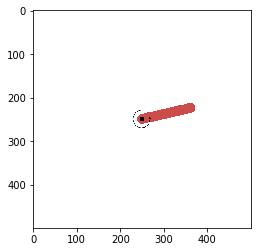

In [8]:
game = 'Pendulum-v0'

env = gym.make(game)
env.reset()

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   observation, reward, done, info = env.step(env.action_space.sample()) # take a random action
   if done:
    break

env.close()

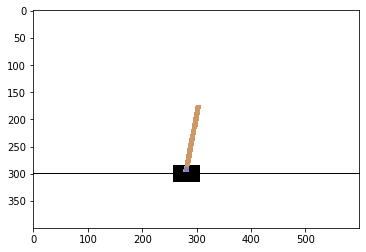

In [9]:
env = gym.make('CartPole-v0')
env.reset()

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   observation, reward, done, info = env.step(env.action_space.sample()) # take a random action
   if done:
    break

env.close()

In [31]:
import gym
import io
import base64
from IPython.display import HTML
from gym import wrappers


# env = gym.make('SpaceInvaders-v0')
# env = gym.make('Pendulum-v0')
# print(env.action_space.sample())
env = gym.make('CartPole-v1')
env = wrappers.Monitor(env, "/tmp/gym-results", force=True)
env.reset()
for i in range(2000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done: break
env.close()

video = io.open('/tmp/gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

In [11]:
import gym
from gym import wrappers

env = gym.make("SpaceInvaders-v0")
env = wrappers.Monitor(env, "/tmp/SpaceInvaders-v0", force=True)

for episode in range(2):
    observation = env.reset()
    step = 0
    total_reward = 0

    while True:
        step += 1
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            print("Episode: {0},\tSteps: {1},\tscore: {2}"
                  .format(episode, step, total_reward)
            )
            break
            
vfile = "/tmp/SpaceInvaders-v0/openaigym.video.%s.video000000.mp4" % env.file_infix
env.close()

Episode: 0,	Steps: 460,	score: 45.0
Episode: 1,	Steps: 739,	score: 185.0


In [12]:
import os
import io
import base64
from IPython.display import display, HTML

def ipython_show_video(path):
    """Show a video at `path` within IPython Notebook
    """
    if not os.path.isfile(path):
        raise NameError("Cannot access: {}".format(path))

    video = io.open(path, 'r+b').read()
    encoded = base64.b64encode(video)

    display(HTML(
        data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))
    ))

ipython_show_video(vfile)

In [13]:
from ipywidgets import Video

In [14]:
Video.from_file(filename=vfile, width=300)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x01I\x88mdat\x00\x…

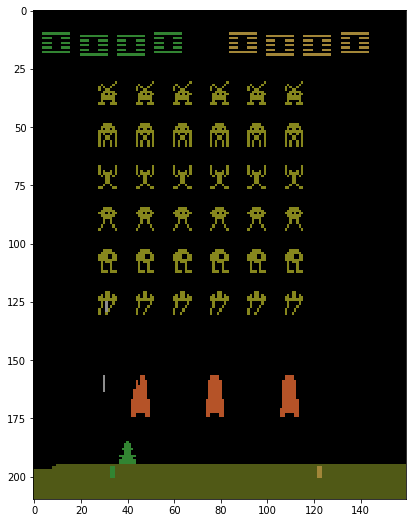

In [15]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('SpaceInvaders-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()

In [1]:
from IPython.display import HTML

HTML(data='''
    <video width="360" height="auto" alt="test" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format("AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAhvhtZGF0AAACrwYF//+r3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1MiByMjg1NCBlOWE1OTAzIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEyIGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAELRliIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAjQi8FtY7AtjPgAACWQLfQvoBgADd3auVxz1CajEPUkyBOIeYtadKLwM9g+vtMuhgKeohpNN6O8XniZzRZT+6cre9ppjvGpUDxZHEEv4bqR+4eJiU3kYbUJOttZCzbfERTyikVusEAXqmv2yFM9kFA/+fwCkfSYIUbcFHGyWAxvhiTD33NGffistmVC5Qyvjm4SJtMGlJUgxWohmrSOwr/WGF9xsADXTr3yVC8eYKj7eBh6mr0RAFSUFNojij+RvlrbSFKQoJrHPfQPA3LHODcqsFwf1p9R4IaiUEE1wYa6nZfngiXl0WfG4QXQZ69LFj+WFT2p/s4nwtQkWHAO356tueolY2JMr6eoK6m2iUorgyOQ27o15xZcu55Xv1uzUf9UtlaH+JPgjutV50iHbb8YFgcFFgOOodJNaAbTCELzVF1N9wDPBvNBMuyCMdfKPG9pihd821EzJxaAaF5engz72jeXx7lmaMLXp3/lmA5dY0q3vUqkU9Oof+mUQ7+8UwByTauqsWEiNDX7ZTLbUgMyq/p0qH8P/ebuxnsGQxdMj+8i7PNszA2PtJCdZu8LrNxyS/0SnjGVwAAAAwATnfve2bH1PwHrUxZS93hlDyN4Bh4zpwB99XuHDY5r7JnrDE0zOHohEYyEVrxwFNkwpU/UDeE8SixKHWmzkAA58H9BZ2Di9s0Doh3Ytx/4tEU/GekNDrn3sZI635wV/DJfkHVkIT0zjlZspz9lOd+2dzQ7lkksNAmc/0x8jHHmhoPV0O+ns6zrfhtRI8LFVfZm/quO3AMCvzC4BxquxnJNze6IAMAEOWGkAjvpZrolGz48/2HdNkCjiA3S95kmOlbsRhbCgWDvH9EkTvqo6U/gptEX6F5xS5RYY3pVe1SOwI/pL71oaqnb7GYdKAIw7gPyrXhn4EIdmuE8BAfiBr9hpHar98SfZSMV/98qMMckhbmdPn9VVMXnbV6eR8g8AATkcdWaxnfjiISEvKFlC9hHZiz+z/CFyAmwmJshA1dQKcA5xIhBSqAVSO2Y5ZdynFRjJnBA4AUZV2ZSbD8gPCcj+nxrRJZoR0PhNdBye04ZXeq1S7P7GzA3LKU+MoVZOVf3HaG05/5EOEoQW7J9ZhYlJlAY02BMFTgfJ0VmGfn2UaK0oPlW1cycBM4rqIw2gZnvuAUJiukt4ZsdOI3Iz13o8PN/TnV/9Hpj8MaegQXobbmyzG666vinptMf3kbiOyBHjvZ72pZiB8Gq842jQPNHnKO7/M66oQg0F7b2yASWXSEp4hw06A/VaeNplJupB4X616nmPHuWLxPt6tWsNSNyufHtkO/VTfdNFIFhdfEHX6UCDywQE3cIPbgAAV1Z9IPXgMGAQygYdPY0Xnkc/5ID/TAQz2HvHTlbYH1C42XfZJQuFXnAVKF6f/vzca9uZ1LdyzVso2V3yx14QqpgPawE3bvPP2j2O5+PgBgE/jQ99+4v4BLUOHUaxpQ5Otb9eoHD6II1IFcCsdUt2cfiiqVe1gGEXxU5pzAaBofv66gN+pVAbvMCFxQ/ChoZQLXa0aE5U6sLFQzLKTtazLGNejM8vbyjopOXL4oBzVpCWEiNpM3+cXmI1OBtajQAACnhIdD+3+h9A5jzg7x42EsrOqe74Sj+a/cHZJfrld2esalmuv59otwmgm52scQRe61kEWRu3Molh5Sn55FZPxT5ngecs+tD6nnsQVR1HnW6kpVCBRZ+OryLcFjQeZnU/tB5OV4gkeTemCetHljIDbmbp6typpcDoEhfSGRb0xOWJj/xPg6lhVtuYPh/CayAvuKlWVPIfKqBThJ7W/Bmp+ZwsM14dgn9VyV4qZkIAvVMDHhOoqK0i5t5pbHXL9WwPi9RsXOdRIIezyqA36AnwDEoedTR/+K/p7AX2ip5o4kqMZSM+p+jZyyehmXYJXnZLL9jhEPfTVs6RQzeX8zjBDqCkpD/Ij9V4kwBKLGMOnkLTKudbousvlfKBFAVRzSy16jh5daIv6GHpLZjssYNR3eXgT8IDED1gmFWAUNpntM9jdKtQplX160UFbM7IWis08cC1dIz2JtWZXPBbCsgqN6VigxMz38dQdrDwQOD2TpoDJKvRxrCiHOUofBVwlKvCMoe7/HnLXD89YSDbAgSpfEA0qW6XJ+bSEAbnbQ+8mkrFTvMcOaN1tsPKQDHKv9Wp/7T7OzbiQVuDu4EuxJZewp2CCGfTDtDj9XIXElTG2P+/sFUN3NT4dAkuQ74TPYhG7oYIARlV9fwZFnndINV68pwNZu5gFqmd+ApZPjpRYReF6+QzPqvg39hVKcrMtTx8D1odwXewpIt3fyvkiAwSRR2MRzNbXVEPT/AAnUhwUONnGFejXq+KCtKPtm3IIZACMod80gv1+xm1pS1feUC7r7mQcRUnU2mL0o9K9rgcj0IziK2R34bJDoX02SzVeb/yPt9b8Mi+GMEK+AShPSVh5sTxFNjRXdgECTVKUXm/dnALeoVV7tdrnSwV8flHw5zujQET052H8DmaIEtrqaykBgKq6gTM9LOsQDhut3ttc96eQFXXW/pqplJnpSc+xq1Us+DF/twwGr/lOCMyf73xQ+FfGzM9okg/UXz4doQSWhJ9g1ZLu65aAudgX+nM8ODnoE68hiuoR7pkiUg9FRJkUQ6sI9VtrhGMYGeZ1oomQJ1f3TcOBQaYw2Jxn9HqHgnVfD39x+tjnAHi3e+UmEBbtRg1/nDLWlLi8GTAwjq9u0W/eQMdeDpOMkva1Q243Z/sVyC92jwphcKRolo/V9CAI8ZMD1OUNw6UisLZ59YaUAB2+1UXery1oqrhijbCoZ2AJqnXw/OPMX37Hi78lkj3qBYYGSZu6Vpz+0bJ5RFbM6K9fYuCWhvEqQeqBwJmtrGfuZmdwXp7RN2OQRQv+9BYOJ83Enx/lhIGk8+UZwiMHWUu6lyuPOMb9lNUDcoi+JURPDE5vWfX/g7C0W0h+OF7uzVO4rT13GUe92F77KkPzO1jEadtQH4/NY616HbG/UNOMuWfP638yMbj9oq/IbQ+CNyisYZi1rHyY3DbXdjgBfmbtF5OWrKZWhdGwxKtQpeH2RYqh2jc2Khfc/NRlhnYo5t3896jzkAeTTMk/kdmbC9Yxsw+5m8w92y5E8KMlxGfFdavm2SJ+0SmJ9bb31ZXjYgJY04y3oMmUBWqeeXBguMQtMN0E05+co6jXsqZk1AdDc/f275NB9XwMBssNUwtOgRTUHnckk5CgPsRGgdbPjrT3/LzZF6V+RY7oW4pfwoZN2mIzZ15C2wYZD/ZWqeBPooTtu3XAE28aGImQZDXsJ+0TKMlslGZwPDRryStcaqgswuOnf87xQFTkYid4e0+r6YHAzd0XmB3DZuEbOxCaBXfofimDrzOv+u19UbYZWxeegCbyEPjGoy/xm2ldz+oxqHKGTT/8pNvTF3Dl8h0osR2Tezvi0BBld57p+2E3//e2/76NVTgGuCLENJZOSpVreaP3UhsYQTmBIiFGL8SddhnBXMf6WkO6Wj/OzIwGWqfj/vN/kOFUt3jUn6m4HaT+iuBP9G6kHReXSUewWgevgn5f6RwABp7wuXcUsGUP1EhZLPycufFnTlA71XsNku0WmIZGtH++cPN25Do3Jt/ZtVyULNy8J78peC71zS6N0kKh/pL/dMARfNp7mIbk/zh51gxIkyXa/Yz1uRF0rgm4YmCP+wKynpt2KhLXKHqcl9/McwnDnlsP29tRcFeMNwIJQF4lPxx8t1z/EN9LpZqf3WXa9e0o+1KOR+gJ4si1XLfR/xXnyYzjvUO1eK0QbqiYZ2GJGtA0/9dvFZ2jy26QMjO1JqAY3liTldRQu35wABFAvHmxpYntgPLbZY0EWvfOdzbQSaPE8zgBnHH68k/0Ql/irjS39VZyVjf8i4wQgUkKhNMtHr377UVw1IHEhXdGdS+GrX2F7/KfSpzJ/JGnNKAkZ3ORC8W+XyfBnPwS0aZ54Hovtu0lYrqDtfK5qGX2eYgag2+cI30aBJrByavZdDN7JJw/sBoKIfT8cJX5+15VS6dOlNTr+LDel8HVZQQMeZRJ3DzFO/t8sqfHvtsN7MDDUvx7fYkA2n0TIXDEt06VxxKvrui1j4EELCfrSir3odJxNVQGp3tKcAAAMAyXDp3C2eSQwTpA0gjaCPgYFtmb1mZ4vbDn7cZurUAjBTQTo+CQPbX8yJW7bDpPxJb1EjlPuTZswdZ3PpSjo1YWVSUjlKyTe1mfMHJHNTyVgG457qJ2k7VtQwphqQFrkZYw+kz/AfDZfi4QL8rct5FGd4O0NgQDuR4NMTx1fYzhkRK/vj9IIeOamXUPDD9AvL2bHe8SoaXVfuIfX6pe5MSs9SCIPMSi5cz3FvQvmN6F3DBII8IJiLV07xgoWYUvrxFh1FixN9Hb20U1pPd3awUtseiFf0UrsqU0la2PXWkACI1mdzpf1bdojF35RXollaR5NinUwwUNSgQGDV6SWbv0CBVOfDtQ3I2Gx7Ve6h/jxtY9yeSz1DPIfbZXiw72kwhCTGZEQLy1ilaf6YEyGipVzb5SSFRyiN9YvR5Q/8wvPS82V9saIrryfEi/2JtrCkcUeQCWTM+sGy5HuTHMsrKc9VVhU3TK24kF1euXFP/8UKIRJ4ABpY/vjS2dxR9CJlLfI0QsSdxhJlpOogcbRRongerEpOwL8WknDMwsHltJZXkdfl1PK4kd0vwD/mK3QFXoa4xi1wcAjaKvpekOXU1wg2YZ/CYWI3KySIg9i44nFJZOu3frrf90Uurymjfu9uZsgkOZVCwP/PYbJl1JimfrfxMl/PoqQ3X8nCEE6oo/0ztZfoJCQSHyVBF3r4uMwyDomdy0uzYH0wGZy2dEVw32/vlLQgu9akXrjFNI0eZfipmf3Q6NGSo/19GS39OaZCXQseK/1V3GM22qFyHjQ51GcfVZF48rSPsUS3hfziFBMQAACZoBc0bF4BI3yLQR7HvDZl8tzwWrwV9nbjcBZiU2PwT7Qmgexi3pMB62Z4sn1PXFP8xAmwdp7gtUx707D2GpooaFYAWFtQx39zYMbLtunkWJXEug7DUbrlDMe3E7rRBsaSA6ao2Bdjtjmp+3Pe6bxiQeGTKNltljObs+PtAoSfvKCqnzGgBa1MaZ3h9vjB1otuczKou9JdlWQ7hiVXz1rd9XfdXX2T1js/JoE150/L3fb6w9Vs2Ww8Q4NBCVG9hFzKEWbKsoZ8FC8iQ+uWZYNBtqpOXtVP0f7IcFe8LRXM6KVHnoWzGdAGSmhX20Jgxlp8+5NvbXg33pKsHWU39/OLA6SlRhdNG5fk+eWJJRAQ6im/wFeXZm7nCaN+EkxQ1R0mNjoMihbP5LsR9J5XrrI6So6cu5uzL91BiRD8XrvlXcGAmjDDYwILNIF7jtViBOlpf8CMh+XmGbZok2oJiyhEVEh16IN5l8jJPf87MQhwLw34o/1QsAUJUrtETDdfgM+QiytdwNVDqDOPMN4Awh9QgAYpnT3hFVGBM4CtY4XYV7NygofcPxzh4VsdLNBfpnLqGByvg8BwkEVmMMg6iR43MUYsZgiT4VwEQqpP1eduz4o7lUE27cedtjsUQ1KMAC+XRk9bo1sFbNOQTSawB3ZypOwQ6WCgUP6If+cBi6koa1nkCAElAAAB/EGaJGxDf/6nhAEdmuEgpgDgAWHXFjUdjTaZPezzaVkTBBILBubiOBUBF+FWZ1iy6p5c0+1xU0NF3qazS/0C0xguHTtTKpO/JHUa3FvHTem2T7Uk2tvZkKXBuWccQYOSwk19agzoFsupK2M8gYfHhF6Di/jpZ15fZTl14FUHBhz8R/bM33+nc4vEDsiXTQLusZrK0PGKawr+cLOWqcETvaN/izsUDVftOItABKAECHZvf/Eql3/6EMKleCjZ3T0+KnaSIQEhCLiDhw9JuEvA040auNQrrskL9wlyhwPrdZ9Psm7TstB/aG+ic6yUy+RBBYNopr6cYNWOx5IXKMgCsLdu7m3qH+R0RutQiJUtiyBXuanPYK4TJEXqbkJNk0lWtDmLct1HrUn6//g8HpOEphwLU49bLcAPbv8Fdr6RTcyrfpU11YlvZZTOvZWZcCq66yIHJ67hlvLkFmAb15aWaoo2OdISKC6VvRtZHJxaNaTj/htuJ3CeyB3JRt/U9wZmJaJpjxgT/iqOcvnMOPzZjk1DrA3m9ZAjcgsFIULqfpu1Uz87HzXVjXP/2P//zMv2JZ5wCQb9PzgDC8oWwxGCzC3jOuDEzXDRL2gwYuVrjGixujWziVIUqKo0jRtHXEXV0NB57qp9vK8Wtc0bYe2o/NYezGWdCsAD9XU1l/AAAACcQZ5CeIV/AA2A/5XtrIFcQ4xEp9kO8Owwt9r42Hprhe2cte9xkybK52weA0NZ2u/l/MkZw0P9vxQoF9hqbENbXDcALbyY/pdRm8oVqn+YUw3O+Zpwb6PGy7SCyVfue1z9X8GooZ+CHlnlYvyC9ekBoJOf+w/ihfboniiv2kpFcTQFZsEogaAMfu0/vfzY+/bmQzoYzBsIpSiwArDZAAAAYQGeYXRCfwARVpPb5L7C3cL2MYMGRl4MOg+dtbxny5z1C4iQ+I9V0CfJ7hqjv3HKX1svxDoV3ABCMjxC6eSdWqD63ql//OsejbDgscZklW31Cn3dL75fv4myky6RR+LHsF4AAABAAZ5jakJ/AAZx4CZ3nRrvA+NiAc/9MOh/ACEUxSsJ97B2l6RW/X8CeOuQ854gLBaHcaxGJwY2uinHeLU8dNXvoQAAAFJBmmZJqEFomUwU8N/+p4QAK17wn+O1BfBpvwoAA0oPgAAhrNejmSHqoI2YnnNTrnvhw2BnK/qRiAN7V8MRMnj9eBCUd2/Dldd7e2x9cjHH2kzJAAAAXAGehWpCfwAtbM2k5FG9DxSZjaJgHmWayLfOjTLKs/pMACDUt3TDyiU2H77dN+uXkvNVZlXQoFkuiAqxA/Zc/ZEnDJ4I9rlaUV/z9OWhycUAeAjYIICS1XCLKoFHAAAA6kGaiknhClJlMCG//qeEAAADAABJS+bgDloDOV/b6F90kBzrLyrMnjUEh3apGtED2M98iSGeOu+o3rFa/NXGhuWbmXtp4PLMv0zQuK+gw1lkKCa+qtYucZQftX/k9Mv0gcXugNSIF4sulpP2TV/+oJKeSMa/Eu6qpX5XcVYk6oxx+GwQgkl1AqllJgS2/CSJU6MD/sUzg+0ILSFTvWPK4CxV4C01bYY0jEQI9nGGfRv7vAsg3bS/vpEGJ7m/CWSXT+2Lml/YLi9mHxVxJT9aEOcGkLihzlVOd2QfdRNBdnj9td/kwtd2PY4SLQAAAHZBnqhFNEwr/wAB8Y3YDXrDIGWlNit0pG3VFyv7aMvWZviTu9NAnIAJnAz0ssp0cIlVUUcQK5zzP76FcFWh/c9NTPoIwHSxAohfpnar5+FJpcxNRV4nsp95ihqgrZxUEyEgSHr7Ca6vnJaSiTzKdjDbXnYFdsMCAAAAcAGex3RCfwACjoxq+7G2AzXRdtAA2grfrGTwQxxpWArYxtwgm3sTuHroFAQa32BcUoAY2V7TGZqBklOVtizq7z9MnkYaMTUiBwtfRB2osiYuX2izQQURveoF8Ei8EScbhhY5vXQ+1fhr4AB9HNJFvoAAAAB2AZ7JakJ/AAKPb+BrpiuElxkdT8hggOu3AA5orfRlgNeKzbcchoJWNCpFn86NKmWaZPUAfHvPHrYH+aVKZIsDBNWLLtr2be7r+7wYD/S6l+yVGz5y6acFgp+WRV0EXucIzKc3Dv/CZdCRUZ5jtuaR7aNRkB0RcQAAAN1Bms5JqEFomUwIb//+p4QAAAMAAEl27QtdIANozPNPAwpxUd7KM4vS+4LSl3+WbdUJe+SNorvm5n6hIB4eUEOMHVHlI9QPS0phdy4spkrK4wo0ai9epNUH3nWizfYhxxIc4f/+qXMFmXj91fSOkjPtTZPRxzjKR7hKoV6IvFqVJ05SsvWapWyXt7yo8+luCkTodbzlPY7o8A3SP8R91/1dGzCF1KHlI7n3PLbxnp/w4rsqzpteuaDzGOIe6T7y5PWcWxuy+ibdE4pv4CkiC8KF5gNgWEDMkP1ECN2AKAAAAE5BnuxFESwr/wAB8a9EX66BsJMKzz34vQxwhmDwLZwMAEA2k+6HAqlNrcwWvPmr1hdEYpo3arPa5t9L84jicb1BzwAgFkAQaTbYypVmO8AAAABKAZ8LdEJ/AAKOjGr7sbYH6dEFHKF7ZwAN5Qed+rjQwygPse2hBkUVKaX8kxAb0rb5S5avWgRnro0N0TDn6d4lfSrfG8dav0CIL88AAABLAZ8NakJ/AAKPb+BrpiuEkqgqOhQL/yADmhesjTXdzo5UqqlxOK8SIc7DyRqgusNCULMnJTXHrPkmdbYSsvqfs7DJh3fk3DLiioa5AAAAkkGbEEmoQWyZTBRMN//+p4QAAAMAAEm+RsC4RW6YATRRnK/sGzqIfzL1Kypi7tMNfpOQ375HuLrwE5qK1a/HwGWxFAiXzrZSN8kYtxnwo1A+zNsUs5mPzUqqFx9z2HLmDWAbj6R9p+AgrpwH68edf+UFY1N9hq7dJLRRHN/pctrXUigSpcmQ2RdQVKALoSH2nczRAAAAcwGfL2pCfwACj+b94uVFcVDa2GFvOtghUjYglGMwsKxBABztH3NnmJ8pJ7wnsr1zn6S8rvRj2k/v25umsjprPw3URuXhdG0F2x2yUlh4ml9PQ2A5GSUA+1VqIRV3/PYb4lTbWkwvMqnApx3RQIkSoWSSPGYAAADPQZs0SeEKUmUwIb/+p4QAAAMAABz7OGPQhmpVwAt6OvGZkytgAb3YuuJkxTkYSobc4Q4oRvDpK2qSWIsn10y0Ta4edqQ+7y684QZLBsNXgkT0TMzPF19hWZyncxqiYlV7kFFtkAibE7z1PYb/qyMbexOeG0jOHplihkSlicWRUkDs091qgQH1XLz4fz7LkGJit+O8LBuSn2cZSDVIXCn16qjbJTQJnn0fqXjulmS48uzYvmu67XlrI1QGMWujhZSje3dDKHuznODEJjabqkaAAAAAa0GfUkU0TCv/AAHxjdgNesMgZaU3ANPnFl0Ji6vUUeYAcWaytLMyFecLgWKv9x30HSuaUt4PwH/ylJrLRkGTZ3dY6PdtS4nfbp1ycW/+Wu5FicWpu7XOkoQpK6fm/VhAoZL9h/47+Jj68JsVAAAAWwGfcXRCfwACjoxq+7G2CGnHC49rv5CZk+ixsoFNB8YAEPx8bSAYUbR8z8aS1lzrE4amq9CdY+n7r6GH5HeMYHURY4oGslfaBFsbeYc7aXE2icfYmZ/u1fYmncAAAABOAZ9zakJ/AAKPb+BrpiuE1xjWZFtsKPyyhcxDqulPtugA/ZZQVJFiowVW5QzhbgqNitrdQDQssEjtNupLg9/Q1l8gxMaJ87CnKPKdGI/wAAAAzEGbeEmoQWiZTAhv//6nhAAAAwAAHaA/65z+kAR4ci2PN78Z5N2tiF+yUm3U2rz6acJPJRzxzbEVD7funUAc/Fg+yazPYNFVrm2xuzCHDnu7C8wuFYnlxd5bhtSY5zr7wiOGVicQ+d2AVlXfuVwu5L0YVFmrYp3v//l9nkaUAJ9NxuOrtwjDuQazUIB9+rm460vze3+SCVutcuZ6pK2yOC+2M4TWZ5LBDQa4BsmAkSrlJ0ZYT+S+NM6hQzyAEEhIl4b142rLH+lP/Cz4sQAAAGtBn5ZFESwr/wAB8a9EX66BsJMKzz3ICBr3P0Qqj0AJq8qhOO8Kr4gEBbtR1jiG4u1B5gpv3vX6+v8nRNcAc2VDe+jurpCMw/a0C5hwxcwSS+W6bs1jON9xceHi39z/L2qQHITO0YFAIuuvoAAAADoBn7V0Qn8AAo6MavuxtghpxxBpTlUDsKPPIRP3TQrTMBuDU/gAhDzIof7rBfuS46SFXgOiXbCt4KfxAAAARQGft2pCfwACj2/ga6YrhNcY01qA5Kcc9aw0AHKCPB4fOb2W0w68/NbkD9zinDvngZoiI0KJ2aMQLlN3zdHQy64nAOVnIQAAAD9Bm7xJqEFsmUwIb//+p4QAAAMAAB0GGyugi05OgAXEc8r9gV4I4uxOZuUSFxTo1Lw3UC4adxLVW/7kOrdPvGYAAABvQZ/aRRUsK/8AAfGvRF+ugbCTCs89yATlg0ADPaUOmB9yN3yK0ubVAl1wE299VXuKRUwmMZGypumfEOabxcv/fbQreK7g9S94Rms9Q+OxmW78ytTxXthptLcLjidMacDOsll9zS86apXCl8vJYcVBAAAAHwGf+XRCfwACjoxq+7G2CGnHFML3lPscLG9+RiWlJhAAAAAgAZ/7akJ/AAKPb+BrpiuE1xjTYGzTcHl1Sp7udIfBNu8AAACjQZvgSahBbJlMCG///qeEAAADAAAdoMVQUPo3oAOlcl217VeWV2bLoIA8QbJ6pCIklPSw9GxM4tEAHN5MX6OhKFFv0VnweoDS6+g+i77Pc2zMn+rI4vlXsLGFAGxcQwbF+PprpJv9+RY0/0mRqVCgv3vCKWV9eN712E/HPkjyXYTsI23F5A+tEW5Ntr2RFZkLcdyIJvI6H55KgC03rs0K4WfFgQAAAFZBnh5FFSwr/wAB8a9EX66BsJMKzz3IASBddiB63GHVnJyzuqriB+zgA8o3T2uWsmBnd4uOKwlq0eeedVEyM6OMUD/EXpl6u1qGlGhHz6z/xkMDWW9R1gAAAD8Bnj10Qn8AAo6MavuxtghpxwtBziUb0yHGU3+lgAhLj28XfMRbWhF1l3486GH//GD5gw+cEHWS5NPwV1L9w0AAAAAcAZ4/akJ/AAKPb+BrpiuE1xZsDvWnXfAFH/i92QAAAJ1BmiRJqEFsmUwIb//+p4QAAAMAAB2gwQnSAG3ghyv4ZKPa47SoljnNpInz3h9KVG1av6JIHO63HwT4DjI8u0jupvGQ0Rp7xue3LUq6NXVC8O7Jdm0SjQg+9eeFmUUQNqNQ3GEgLbetKK+cMXEOXD6bLisUd052yHwil2ZCvfmuaXVU9wcBooh0btMt4+noZT74JTjtQuy58mprMnSAAAAAO0GeQkUVLCv/AAHxr0RfroGwkwrPPcf9Wah3oATS8MxvA/u5kZEQe4z3ecbimJVpMMleGhp5bUpPpvQRAAAAKgGeYXRCfwACjoxq+7G2CGnBdh+8HAA6JLLpwgmUa1m5wgH6urm4e5gVMAAAADwBnmNqQn8AAo9v4GumK4TXGNfKf0OeyDMVELLA0zAAQBAmqBQHAHC1DToJtMebXg6TZNlas5Pt/9h4u6EAAAC3QZpoSahBbJlMCG///qeEAAADAAAdvg6xdYPCL2Oyh0v6ACLQWa/34H2wV7XxgzsVEoG5d8azbq7/0pIZw8OKcQOKK90Vh1O+et5DfvAU3fXpCaFqUaQiXxfnfPCRGVHaH42TQI/FQCArjcvAfd1ScmssMI5nZ8yu/rHSG6s7diLAqLbdaHbbeQ9rx1rCB0KKjUC6iwAEpY4A1KFzAUHXkSh01j0sZSKVko1DVTrT5jU2WrLfjvPxAAAAWUGehkUVLCv/AAHxr0RfroGwkwrPPcgEsSyO+05F+sgBuvOkVsT45lPnCeOW44jqNfyRKQO45u8N15mG3ihfxxhXhMTMSPI8FoKQ1YFPcJhBbALqAlEE7YKhAAAAKgGepXRCfwACjoxq+7G2CGnHEtZXNN2vHbQ0AB1Dhh6yWOelfBEYhn5n3wAAACUBnqdqQn8AAo9v4GumK4TXGNZmQpKeIAvQAF7sgBR/hi2XpaRAAAAAuUGarEmoQWyZTAhv//6nhAAAAwAAHaCMcnC1WYEdQA2q82zTf/8xzuaWBv58DqMn3rPA3NUTk59806rfSr8W3zeFves5nJgzuTEHucWsm2qgal/Q3a+GzlgRBXwTAvXPO98ISJ3Q3TfTAlzB4ZApqzaMFc1ZA1usJzvhocSRlXwQ6ts1bO19Aq7oTfwqYk3dOxwp/0eL1Wo65qsZU4/ohkOJNmCyhAhtxmHk8LZGIueQPMpz/Kxw7R0cAAAAO0GeykUVLCv/AAHxr0RfroGwkwrPPcgIBvLw/j7YfgIZr/rACDdC9shk17nzjq2w9DIT8df3nH+HscyBAAAALQGe6XRCfwACjoxq+7G2CGnHFL4oew3cGHTQa6GgAOswfdMi56lnPAB8tx4FDQAAAEUBnutqQn8AAo9v4GumK4TXGNN5N1Xhad3bbhzCT+aAEJ8n78Ou9+yZ/jRayNfE/tEmGuLh5C901WI1llVqze563pyi28AAAAD9QZrwSahBbJlMCG///qeEAAADAABJuQfA1CIChIDOV/fbd9jXYFMERa84fKn+WWj/XEZ39yDdHYsiYFsxU8HZZqloL0KHznlmj+J2YNi3sCxy5ChLr1tIZ41NJsJL5oiVjiFr3zOBqbIGvnviEK5E73f8zrAzhL8lSLdCxPvXlc+S9qTYEy0QxfYFRgyTWeX6ZWKe0sKPkUkDz2gDMjoKsZRnEOD8P8dcGjb9tpeqOQykj/4rfFqJGtwJE9C8L9uBR8zoBuimV5D/1gxw12k3EW4AMkUnnKZ0PG1vXYCGT3goIOeHhcewvjxt+yI8cwYQGlsdEKLawtW134K9KQAAAIhBnw5FFSwr/wAB8a9EX66BsJMKzz32mnttvnBZKeMAJq4FaCRN+j5Cmt5nuJmLhJGoW9aMw0aGuUiPNqNICiZdWVntafX8Q4CH+q4PfNe7VZZh0DCWU1Pyv+jxnkt1RsKfg4EjLUOQ2ejqOtwf5o4saif/syP3yLJ+qLZ8T93R6DG/KhNLmVOhAAAAXgGfLXRCfwACjoxq+7G2CGnoqwWj+sRuVlB9elSAB/MmpqePb2m/F/mkHmIrJ6GZ1yyIsjw9Shoo0danMVcPWS65oOMc91o9ufQKTeEYFrgQN8ZKfl+jW9RVg8ikL+EAAABdAZ8vakJ/AAKPb+BrpiuE1yeY+iFXccgAbQL1kfytIddqqf/uhyQYDjdtqIyAiYv4xep1Cb29bras5c/RP6/DgJymZ27kA9j1KV3xT9wyflVYYXkNCxBeLXyVW4FQAAAAzUGbNEmoQWyZTAhv//6nhAAAAwAASWQjFVJAFb9tNYeYHFvmRkPIwKehZ6b4LWXM8PySdKOFyiQ3Xhct5E5OXQqW39ZDJifTpSAN+1q893uq7G86pvqXB9pKFXg8CjIJ6cekCU7HqYhJO3mfGMi7I153IiGsnXMpx3XN8zY0Iiw4UuXi/vxjXjiXCX7kPN/AC8g/rjCTTYsuSWgSv1VIJFljBfhMxgqmp6Fwk0mIc15uP9BWu0aUDgQ9GxGAzxyxoCE5uEjkk/TB8i1S3OkAAABpQZ9SRRUsK/8AAfGvRF+ugbCTCs89+L0Nq/RMgA1WDrdPc/xGiaM18j3GzMJcvLRNhji6EkhywHnzPdDkRXNGQirSU1r6KVRFVOT7J781VZIrArNhW89cLtxuMXB3BR/TRqts0wkM2/4bAAAAbwGfcXRCfwACjoxq+7G2B+nBSfNi/XezAAFscEJ9cj4NA2ntAhLexkYMTba+1SclDPaJAsVTAiBoPSXFjm9gOZaqtSscKxgnxVCGAZxj6Vomf/VZ8MhBTcQCuI7CF/TkcUSLmAqtI0SQEE8SpIBQCAAAACQBn3NqQn8AAo9v4GumK4HbYzVMoS0kiBcAA5rMKBkcL2kLDo0AAAAyQZt4SahBbJlMCG///qeEAAADAAAdzhPNFEciUsACwuXdX81UP0OCyQDKHhpjfNjG5LcAAACCQZ+WRRUsK/8AAfGvRF+ugbCTCs6PyOQE2Lg1NJZrACccjrdO8/iep90RpZBYtQg49CcCmrL/aPL2bYYvOrUBqXBM7Zto+zKY+O0JcR1RXz//3RJh7tlOb59kxqp9k2rwgLEsZ+RYlhfmQju3jGwwxnGHnODG0TUSywprUJ1NlJ3sqAAAADkBn7V0Qn8AAo6Mavuxtghp6KsF0ayYAB2RW/SPPc4Omz1qx9jepDJQAMsQ6xJWxyW3/60sKLt4Z2kAAAAuAZ+3akJ/AAKPb+BrpiuE1yeY+QIpWA1mjCACZqr/T1LTJBeoO93TCcjsJYQUwQAAAEpBm7xJqEFsmUwIb//+p4QAAAMAAElUHtXp+w9cxgcLrwBHh81GvYH0H+Yo/jarCKi6QhmRnmVynLFDU7KCqcWiF4cWoJYo+5NzpAAAACtBn9pFFSwr/wAB8a9EX66BsJMKzz34vIyHuHxEfm9gAfzOPVFHMJms1Q0RAAAAIwGf+XRCfwACjoxq+7G2CGnoqrZG8YBB1vmUKZTh4ow+9W6wAAAAIQGf+2pCfwACj2/ga6YrhNcWa1iwmfwAg+eozIYKSLOPEQAAAEhBm/5JqEFsmUwUTDf//qeEAAADAAAc9RBXACaa1mkIXhwjYma4B86HFnbXvPI8G366zFPg9gDxu01QGAPY9tC2RO7jWoFjo2cAAAAyAZ4dakJ/AAKP5v3i5UVxUNrZpX6HSpgeCQS2Hd8ukAC98WaM6FtNUG5LAJ06cRxVAYgAAACvQZoCSeEKUmUwIb/+p4QAAAMAAEllxeoWuDmsxvv7lgA+HOL6wv95D+i8f/MwSWgMADg8Z42dpmiC81AD1R9pa2zC+FB4X3L25AojrHOT2NOxNsGwCoO7JDoMYaqAxi4wBfX2qmfHwkEVunNZNJjdEkSmORLgftT0LXabAb0avRZIiQZ6zv4dOViPv4F7H8gHxVvcsjo8eLulmgIDHophuXE+l+Oi5IcUXqHHu1AOQAAAACFBniBFNEwr/wAB8Y3YDXrDIGWlN0SNZUNfTgNz1PvQUWkAAAA7AZ5fdEJ/AAKOjGr7sbYH7j7zii/4AOTIJOClqjt5YVtyahSyAb9JzvypVPZ33hg5MS+D/hVdq/xD0CAAAAArAZ5BakJ/AAKPb+BrpiuB22X3MgAOaK353ilDeGPPjeeVDDXkrXj6QOBCwQAAAJFBmkRJqEFomUwU8N/+p4QAAAMAAEllIl+cNmID//AAnI7/K/t9o3NcboKUsO1gB2F1Lcbbkt33DI5DLu93CFlH76Wj+iEgvPaP8Eajilv/MxhQkooJMTE9Tgbk6evRsq4aDctL8Jwb1g2LuQJIBVlpO84XgKsGlhSLaAt4H+QKpBRP5XFJU2tBIIINmTEqqudIAAAAYgGeY2pCfwACj+b94uVFcVDa2aX+hX+BzHiRwAcpzWuUCzWdkXcvfPtnl1wiAkODe/nyQspRr6Ko5UYrgVzbWsV9H7uP+Xyz5Xt8BPSzZcGhZKlwW/slpB9PnHXmxLku9B8vAAAAvEGaaEnhClJlMCG//qeEAAADAABJvkbAtLF0puONyAE7QI0+lqyxiCqGMs3xLZJnxhZyEpH0bXxH5jcTf3sHK55M+wRHyIzPCM3Jxs9R1Fum8bq70UpriyW0ngbXMn9mdIdAPssMLAyZMCrjaHuJMk09qUCY94QnD4BD2qs6qKYfUFxAAcAm81fv1yRdvNFxBu43KQ028ellocSJpMmFbev32ThpIDljiwyBKPcuKdcSgwV4d7wayi2D7culAAAAmkGehkU0TCv/AAHxjdgNesMgZaU3RI1lQ0ymhJm4rPjNkgAaraOxlrdGv8TnF7qPb+IRf1s4ZaeLW3moZaf+HYfO8kzBxm8j6NHMKinRaX0ZdzV1YKjnw/euzjpbRFGuRBjAv6qJeSDBoVI8QVxHceCHMofNXAu1RCy+Xx6rZet3aGMVFvoQdkBiNQDrhQVUX+/HjgMy1bAoCK0AAAB4AZ6ldEJ/AAKOjGr7sbYH6skwyY7UpIXGELdvQAN9h76cgONCqDWhyl8uxUUO424iupSkWOilveNzmOWlxdaFK6CaOCNz39t9R+xe5x/FMcCNeRSUScUMFuS12eg+TqphWns+b9YjJpXTnLhTLAaLgIqkuC4oON8fAAAAXwGep2pCfwACj2/ga6YrgdWVOblsG2QAhGR4SI2n3aHz+Fr4/HSC0kmndaUO2ZRBrEi6iZRrx+vEagydwsIoebOec4nGG6+MDH+Aa5LIRvU+OO+ZzSbK7S4fYGYgWquwAAAAp0GarEmoQWiZTAhv//6nhAAAAwAAHaCD1sQgn1UgBuyDh/aEB4uZScYPiMZiaq7zYXP/NgLZjOCXNr3+rfPLOVgB9tmlk/JZGbt70OQOVwAXEB4YI/RA2JtEq8FyGUyrmOylx0yn6IyQUwK/SEVXfbj4xBH8wlwCogCQXbgakyaZCn7vkpKii6m+gxcKZsK1/eDuooDxZQ0VQ1HgssfaFTCl9E/3ATpAAAAAf0GeykURLCv/AAHxr0RfroGwkwrPPcf2LMWV9BhoP8Pzl5Ql2ABsf9xfO4B7KdJ80+9+9KRQanP+KNHi0HywftsVBl5VRyKi0nks/cxHYuVgMIm0SrmIN0vtd+GFK76JafjFla9OiHPCqK8paonR6s9yM4arNUvma3eDtGH0gdsAAABUAZ7pdEJ/AAKOjGr7sbYDRAi2TENJgAQ/4vx4J27tSF9zaaSBFnxblc9MuBhnft4TE95a+trq7+8zq2cJ/DL23RTWDW/ihuu2Sm6L0E0Ev6hENgNAAAAATQGe62pCfwACj2/ga6YrgdqSiYQATioRdbv+nllNBbWzh310BU3QJ5n/15dWWAGpEL9asHRNBKFdmxf5aq/856ikl0AAYB/iUO0MOUJsAAABBkGa8EmoQWyZTAhv//6nhAAAAwAAT/f3wXdKAA6KAzlftURQpwMJyC9DsVLSIHo5frtKoTefOcS1GIXRQwB3OypS5DYXYnh5ozNVb6gBcfEQUBHnNh+XSE12wqK9Epw7yJza9ao7JpC6wLifQK8Lwy2B3onXT38KBt8QMdUpeyP3zChjkTq6Lcj0cGHVEXtwkAOCjttnNDTxIGACHF9iePYMA90FZ4VqucQqXGfMaFcR4OsEV8w/JrTenIMZUhnFChf+LYs3BiaC2XDbZqIVx5P3Nu3q+KHLy1npjGuH4zr20MHTIZU2SIT3f+xh+2S57yvcVCmLGQdW2JMctGJQJgV19i+P7BEAAACKQZ8ORRUsK/8AAfGvRF+ugbCTCtE4Vh/ymj8C5XoVcCO73wAJ28qYggXnO0wN5uhPp954HfkTVwwMyPl0PhEUR719M1gZZD8NonKEZRa1S3p8j6IoeZowVrOoxmjfmcSsx8oNA4GmsKNE7NnAytASBmJyqi+J2jhGKY1z3EsGtUJ4EI3bLZ6ogebBAAAAZQGfLXRCfwACjoxq+7G2A0tVBXSJdxzi67t03n1EHQvcAtATDEAAg8TMDvctNLOuM52WTMqwFYzwN+A3mo4Z1sBZApXmSJBW0Av3rahTmNYVA36Ta7+QevMl0XFDO7pcqp6okyuDAAAAfwGfL2pCfwACj2/ga6YrhPqN7GeBI8eFAAHPzfRoLXlUjttZIEJcUHixIqASRi1i1knlBuSJy5oZe6+wDEs6+0HKtc0k5GRiS1GAit6aoP3pF5Ka50o+hi6PAHiuAHnu4AOQRIPmN4/ozgcq2VfoLUBAUZq8zOPyhMvpUqvLQh4AAAECQZs0SahBbJlMCG///qeEAAADAABPcQ8EGUABOeSNXElEF0E+m7qdgM4PAkZiPplD5xn9s/Slg5Hi7A+iPpmylPRF6Ij522478vH/wNtMfVP6+3jCiFZXXxHaZifWeQmSs2II7vz7iV6NfkpRxF7va3EN9VR7MxDMuq7qeAxjo3moeknWeyHYM7AGT/koB1pnbnCVd6+7ttJT79FK4Oz5SAL5aiIbGJftkmXlfFWTiRMCCFURLaZVxpiohU9ALHFYxqnrdNeflSFQADJOgI4uD+VwLU22ldK5figBfzHdRsG0cTtT69kWWHKqWZDyz+kDuHFqTVdJvTEhTP8CQE1bYC2AAAAAk0GfUkUVLCv/AAHxr0RfroGwkwrQ1CMBra1tFzT0+XV4hb05ACpDMVY/y//U0tpzwCgF1LKSntyTewANctCRpfF1XsXuZUEGaKJIcrZ8dRbIQKN/Fn6FGz+84wPZebClRaXOvnR3UI+sjT6F+2LYSFxFqbkuTZI6KEtobRW4bNrnlttdApw4nen3Z2gJfkdtSBGEPQAAAGYBn3F0Qn8AAo6MavuxtgikLzbTs6uk9Fv/esWGUBABLU/gjhBMaSn0MPJuVGz6TOvotQBFwVxP6mhHOJ7UywtyEvAAFjcMobwpKDfDsbcQxFyTpJO8xOV6lJ4lpjUijuyDHoeynfsAAAB/AZ9zakJ/AAKPb+BrpiuE9N8FRgcYY6SBEmoPwAcI73mi2PjuHj+/iya/B6G0ZSoilcSIjgM7+wJjlQ7q1ruiFyFzcJE0Qbc28KkWlLNjldGgBpoxXU7zbluCCmq1+Qwd/9tzuroeSO2L7ynN7azX+HeJ13WW3s/ZjMN7YL7lSwAAAO1Bm3hJqEFsmUwIb//+p4QAAAMAAFHAEGz42QBD7ub8vjkYCmQwdAQh5DhIWF4m0Pmu1ZxwdUH41m3xs2XJ3tyHk3+dY1WyIHG7YwGQ3LDTTD6X1nLZ6Oub1lTg7i2ZHRrN0rhvwe4IQO3s7Z3VmgjC5ZmcMx82ZR0to5Ez0J+UklLLdiK8KhrP9kOxqvIAQox9sP/UE/jQ5NaXvYXPQEEVym0OwKuDTdzr2B7nzStcN7WllJz5FFuKBqxKI7mlzch2fgJHIB6icD+8M4ly3D2ifGocCjDCQ/Zqy2fN6+Wi0rEveZRWlnOBFrbLyjEAAACrQZ+WRRUsK/8AAfGvRF+ugbCTCtM3tNjSKISYAL5nyVlxFKtEooRt5+0TE2CZN1A5UWJWaV0hUDo2mfD7Q0J3hyr8ELu7yHKhRci0Awi4yBCU1Mqwl0HXWL63wzmQDXqqhKVjfHbgMnSkcqRxmlXiZ4PmZ3qvjPRfGinmj3HwVkTWJUtX82bVVZSoIY5vsXH482ORYZaqF7xtZ+GE5t5+xFyHABhjuVzCOSmYAAAAkQGftXRCfwACjoxq+7G2CO/QJd6TdQADaCtL1DX6gysKrK9BJq/RppshuhF1Y0YTZfWTsM9rIHs5eYh40Ru1CfDG9rHe9UY2JVdWHoNdAtXD9dPwm7uZSqhPr6C+sIRpvMwPlJGOZgjUQ3Q5Vp/mSxF4QvS8OkSx9qUTOKzk3KngLCUQ2JzX0PnpXZdvXI+AooEAAAB8AZ+3akJ/AAKPb+BrpiuFHk1vBceEqnPuzfioFp9Ur47YkACTYUqXMoHMtQM80WnPZFHN2r1xTUZzlA1zh1T1C2q0o0+a9PqH0oHIIMBpEX/9xO2WpWdtMwkItf8VgBIXNw5UJpeLtAryEv1HldDdnIukdq9FXdmQbQwBRQAAAU5Bm7xJqEFsmUwIb//+p4QAAAMAAFGh/jAfUkJACwrJWozc7QVZn0KgYfJP86f3eTAgryIAlXsLboS5iuwtMWfq5ErFWXxLhhhF/twGWeFipvA3mgGZmUdHIy5ovexb6NEY2ar5JlO6Y6ltRTOFKtvWNcC9oNxWu/XQYj6DQ2HPA6hl2/KJT3bzarEuWt/XlrS1R3PzdW0ZS7eVe7PsPRfSNV8WJ5jXWSlmDejyRN/KVYH6SVQGs2w7vwPdq2tFyL1cJNWZpntV2rR4wGXc33c5SS4EuFb/6oNqsX7v1KXgmhd09G12OtJEDdYUGCKEdvGJMrAdTgVm93FaGR5CDgOfYqpBl1SPwZGc+H3VcH3ABphSaeUuo1T3/UmYr0+GNT3WtkmuOlCMbs3lCK0tDhVM+q+f/H5BHoFti1HcI3TdGUnsBHPL+nCBLgvcFluAAAAArkGf2kUVLCv/AAHxr0RfroGwkwrTFp0gTQAQGAsMXCpga4UkCTTxnlb7DojAUvGziC/d2t9guiLjDAmmEfIZIfIsYe7qFBZVtEcoT3adgKmMNlU//znXo8kbmD2EtpAgYUwInQU4wbiqnAm1Ykb3mPC435cMN6vByrXTK4kuTHf1Cz0JC1KZwtGLZ3LB1DGys6OM7Bml3uIZuH7xIvlRu/JxEHbGrsKuM+0fZx402QAAAI8Bn/l0Qn8AAo6MavuxtgjvJmdhAAa7m3VZojjMUplo+LBW+DNnf/6dotz8zgV2rLWHBhXPfKEIuDmpa1pQacleOKAQkg6+z+8Y6oY3+NIlfy+KcytX2SWnigg6/OgrRkTHwS9uvEyZKESzDJu4Kb9ybgZYOhMvdVljS05bU0KQWDF3Ck082iIsIZH60bs1EAAAAKUBn/tqQn8AAo9v4GumK4Ubw7KFQAcpz0RKTE/Q/hRPkEdo0KlQRzQN0cH8YmkgWPF1YrtS84ArPcRtrfjDe8Qg5KdR1I3Vf8VSGg1C4O+EU8rKwhXNeNK5Z7nv2xJD0BZctVWuyDsCUJm3gppjzKS+PDeGECSrmMOj2fi10OHCZyBQKxtuQ1WxyrBNdl5tQ8s23UoCf4oBd72Xyc80YMtrCDNeW+EAAAEdQZvgSahBbJlMCG///qeEAAADAABR81+Ti01uPQAJ1yxnZBC84a3umrqruszoUuNAI9oRz/UqG/l5DDEBPv7/V+0zv6E0KsZ5PbVayZEWANweURZmx0idxO25sgoBrEXNYftX3bdIbkJRjPUQailvKwoxJuFPY2C1BCy8lSSPN1itAyI73G7iyyu1L5X+JiPuOoIo+VW3cmynbkXUbF6iVMgMU/c8J2WV9GCnY87znRYPJi4Ybz9GH4+3VJTpgcL9yQWMlo2GghtLuH7G3zQkHuKWZCQrnlvkfUFrviBCHY2sA2Z9Bv5fhIy9sUoEQHxMbsW8FA5LLq+pWAoUVNcurqlqQjTLzg7rdrClfxYfJnN0NrFCMXPmW/W2rpUxAAAAkkGeHkUVLCv/AAHxr0RfroGwkwrS3nb9AUSAB1ncTtYeo/PISvML3yCTk9W0i+80Faq2Ud4zZGGBvSL5IIJcdf/48U50r+EYKUs1xINrShXg9nBdDWk7KJYHp5uYVKwn/Ygg4vg5otY3QolU3NkiEwGvB0rFyS+9q5Xg0oMrXcd+zAPp2iMDSoa5iTvUX/McD3NwAAAAjwGePXRCfwACjoxq+7G2CMyGHZmefbAdrsQUABw8uxZHpv5vyJXZ2SfgFJgq6zMmL4nCeHXKXReeL2JCcmHjg5z6AQR3SkpvPfxo6eFEXVVqpQ4pthpbfpECN1fvQHCzF53EYkew/H7cIeg5lo7zS0105FjidSOFn/89f/PIjvgKa/z5RJ3xU4evMcodbvfAAAAAZwGeP2pCfwACj2/ga6YrhQnLTK23VgByIiUOs4AIU4HqoaQIDuQ8wkYJLTFT4m7segUjGEjpANBrfZ0XhaoYA5ynpg7JsRpXkcWEB2XHuzEDQ/FhP/Rf8dNCG+UjPUW/Dt/6gsLRvoEAAAAyQZojSahBbJlMCG///qeEAAADAABNVGkSAIlQGcr+N3WkNFOWhjsjPisgjAGqYqKpqrMAAACTQZ5BRRUsK/8AAfGvRF+ugbCTCtISz4GZ8uzQnandn2YCKNqWs0gBNGFPdzehTvIGYXEDddVscZP4Suv5upie9po16QXJCnn4sCuX5ERr2HyZor+fTu/J9i8LPqQ6AYGppiA4QPjDzho2px6BTfUVuru0Ruml2pX12BH95B/Q4FhbLbLA+iPWvwGsuz+2BPvg5lzBAAAAPwGeYmpCfwACj2/ga6YrhQm8ixeepu4AOSvw7xejZPabj2GB6H7QNS5aisrac0ADpn/zdoyL22qjzQVEXhwT4QAAAQhBmmdJqEFsmUwIb//+p4QAAAMAAFGhPAQZvn6B5ACajpPtkppzNK8o6FdOPf8eD+4bHmERjoI6bguiVfhfqAbs/A8nMR5CwxvrXIBm8LqBEwZvURWs//7xAzJVRmlY2qppqzX0snmvU9xG7TX+yudCI1MIlY4GWnAbkdjVWEELTtvsfDuowruSvkdWrCg9EpnNWrw7sykJ+6G+9NbX1tT+HzMFdOl6h65wlemgAEv+csP57DkRF4j9DoFaXhZ5+lWCgSRZc0sFd+lDlRVIFdECnl620DLwMcojUIIhb4y3qFSnC5hfcfihQCw5epwi8Sjhv3DQMk73kCTZ1W7nC0OdkcRnzAIkjdUAAACLQZ6FRRUsK/8AAfGvRF+ugbCTCtIwmGydcQywAhTzo7GP1ACL403C68tAvvgOZXb0Mc17XJpwn1u0ejH3S4uB7NTuWIaQs8VFEMlaoRukwfYM4olwkI2gdubBshEASfZMISfaqtmWklqYCw77s5cxV9TmPzv5U3Sy3VJXQqBmZqfq3XxZ3nkALJhO9wAAAHsBnqR0Qn8AAo6MavuxtgjM/uGYDEQdKEqAAXW08RKMhTKR7eDavErPpz1UfsRs2F1XLSUHuWbcimfOUdA6wdhmI4ymxUmlY69P9b/aFi8TE55Gm9jTAeiuBItnURorWIzFIIpSnlFtyExVyslnHUOqQab9+5oveknbgcEAAABuAZ6makJ/AAKPb+BrpiuFClOrsb+GABzapilXtcAA5an6fUNeDixpllJUrWVo7flwF6+9LozLdFCetKPvLn0941JVFGMuWnqiL1jX/xQN575iMLMkG44UJf1oSo3DtEh9E97jIZFlSD0SiN37OwkAAADWQZqrSahBbJlMCG///qeEAAADAABRwAUFNdkAJlIug/FxNZ6cBFLaH/BMHQhmF6buzR+btLvFbb4N9zmcOhivlsub+GMqvjzoNmGV0qC8Bmdqfz+nD6MeLxu1bgjTUvsGFJXgEE5VyjM/yP4Ctwcd0P8TNuNO5vEOemfN0wCj5lJq5pqLbo+wuRb+41sZ+/xXIulNCdw7OzSzNEIzlmpnM/2M4ZtFkFFUvtwUQLs/GnFU2V0dKxOFjmGeCMAgQttp5fs+IsIBxOldeAb8hyTDC5Vgzav63AAAAKZBnslFFSwr/wAB8a9EX66BsJMK0tsSe1iQAbQXR2NpuPWf4ANSwaOjEKLxqHg2baI2HcNRAzKN2F+Oru+OzJAY/P6x0xilcQlnl+9moqIUybO3PgGyiatOG/FnDkZHuAxw0JFdkZfG+ICBLs7LACPgfdntDm+hxf905DL2XF/NwyzK32a0dj24cvOAbXoHKnuMgDQR7Ag4lV3qFnfBQeK7eGx+jTxAAAAAcgGe6HRCfwACjoxq+7G2COkEYAgAb7D32J+37WfQxGMh5TLo8ttsVa25c7VNRjjFtZ9fxCHpA40QyjENlNsAi3iFCoUAIvGGIJ76IPIvA9Ax37/tw4xL7rFjph5MJov+wsc4mOTHlgSgJiR+voOl8abwBQAAAI4BnupqQn8AAo9v4GumK4UeTuwQAQ1Cp3kF7g9M7H0Vz8GTh+VDCUY23gdbY/kl09Wj3Kr0Sx+mtDu1WvE6vfQRAAY4NINHFk/1dW8BCChO+T9wQnn6lPKFoR+7hAQ9B7v8NR5yrIYtjSz4SpptlyIeTSshW7KZiOBHj0xAHZREolcsKYw9qZhnJ3mBXfwCAAABCUGa70moQWyZTAhv//6nhAAAAwAAUcAFB7bigu6iwgAOzP/MVqX3QrlvUqZDz5rUZ/v/U8DzdQZm3Zvdk6Firxox/u/Ve4hiBG3bo4RtqXDZKaH+J8iISBkjr/I9VCiWmiClCW1w7CrOnMTmlCQ6987bbKJjK48Jh3DJN476STqL0I+lxgZfZjdOc5IPRkjNsItFe60whxZgAw6K0SDiiC4ayAtgGaoC0kHLKY/eqPIXWbfCpv4o+L3M2lKsBwGs/Jdz0hNauTSv3YprG835F3OMlQrJQjsZeL9vrWvlKxu2QsWUOx27pYmLINZ2RBxVqvD8inENJ6h+OvtOLVOWCn6aH3xRJnwVzrgAAACYQZ8NRRUsK/8AAfGvRF+ugbCTCtMp7t0gkALZ50djX6BLT1plu/DtCKf5fKEw2RnxalTgbdPouAJsvB11hy8EUD8Xx1KsoqWR79fm9GEqy8X13SGBBlamT1IPQAJlf2JqvAh2nOktIi3I0JYGcNLyKT6CJv9IjiHblUkCcKvRzVxdghpF4jjFAqhdA3Thf+n4EC3ifiofU+UAAACAAZ8sdEJ/AAKOjGr7sbYI7K43m4QAQuceeYYcCx8UOSLHirihD0emup5hEj3ZTsRgW/23V6Ho0k+EERO9DlRRVaDDn46a3IrcNDdwN6dd1gyBUs0gInEoATVT/uqUvAEJDyN77o8g1ceVxfnpHph9fkxZjQCjAAFm431xrs9lSWEAAABmAZ8uakJ/AAKPb+BrpiuFHk4QgNzOXw6tKbi4t0AB1lTV7mwwwu1YSAnPgzbu9vMrXAyfAEvAVshNronN1bXJLe36mLk4MbX4hbOF5TQGC1lFjrKQaLVsBJ+ZwXbXUuz+QMzhJMZBAAAA/kGbMUmoQWyZTBRMN//+p4QAAAMAAFI5l1+i63ZYAAu0hGcrbp++dLDeuXLq43T0RAet4H/CWg7Wlgkmr7uv1+4r9Ks1MoHI1yGHv41fQcpt5cf4mUoutS1Y8OxYPYGx9rXflJ52sI1ZJqV3Jgp8S+LD6r8xDtdg1KXPSg+XtdiAWL1OUQHJR6P9ErhfKNVpcvsnLxZ9k28slUxoixE0b3cyKdwhh33JdABOUTk56JAmjLlsVqZnn8AbZlTTVyAzJX2NDXC7ReqeLBJHZzcVCFqX2CCHeHOR4o20/rK4VaJYYaIMwYlMuY3AB0hyxUpggASvlEa0JkKuz7KbodFSAAAAfwGfUGpCfwACj+b94uVFcVDa3oICQi2yABfKjDpVZU2sqzPubuWLuaWppci1YFLXqdT/h9pkn/Ui8x1/h7O2CEeWT3gLFrtdK20eZFChbq5qlfRLkf2wOiL0bIngaxh5lcj4WB6wEN5ULovSt9sNFgVlIrn/CEmL0D/+lAPTIWsAAAEhQZtVSeEKUmUwIb/+p4QAAAMAAE/5l2jm8oeg9uGo5oJeYrAA6DhKnq72ZO82u/aZwMhDAnRuLcZKNl3Bs+AhbSk7QJwzOFUcb5MwuqsKaF2t/ekkxX2NU6FzHpv+h1A/57H+lY4V//zHlVkUyron/rikOXMhcdTUwP9Graz4geUhKxgbSh6wq7+QxE96oQg9zVmIVeaBKSr1zXihBcm0zBHjg4eWk2FFL9LJ2F7CgnB8lB0lFXrzxnag3pSckdY6hPFo5WzKNdLOSEEmjqytvOHfE6+xk7RwNmHe40QmkEb9uQ7eaMPWILo1ZzpP3kqtnSGandOwcno75WKsXDVAaDqEM/bc/z9nZogrQAf8nZy7ARYlfwpI4ocCLwBu/p3MMQAAAIlBn3NFNEwr/wAB8Y3YDXrDIGWlN97WrXusb61QIX8LndCz4NuRlQRpvxSJIE6f+jzaJCfMAGyya9AR3my7QSE1VDOqCYzSfFJfngMKird/OgduTX4Ta5vbp1QXXH2vBEo1/oxjP4hOGL2vUr84AFvFxr9q/aG03SKKboBpuHF1zrxCTBELumhr4AAAAIUBn5J0Qn8AAo6Mavuxtgil3nGtuFBNwe7sgzPAkxHS5IAFwyZoQnhMAMjGiVEHbdidKCxPNC6vskJdv9LX0ZS9pik6v2NGx1Gsvujjdz7ygMjH9LYFyjGxa+qqVkKoHQYzX7SG9ySFlnQU5i3VBnAFjZU2pYQtGTANLsqX/2iEd0K6iMJgAAAAfgGflGpCfwACj2/ga6YrhPi5oAFrqEIS+R3Vr+z+8x/qa5y62ZZ0ou9yCJajusQDZGgECbp4grHZDZfRGOMo2lO5qPk1eiHpLO6InZw0cvvqhvR6JUeQmUnRdYBED0MAubg1u4NfCFYGMFfg8EN6nez7pFiCp0TklQz1BzazPwAAALdBm5dJqEFomUwU8N/+p4QAAAMAAB3OE8kKviWKvbtz6v7AAJ27RHD3KHBbD69riTOBmFsoEMzRHdiV4FvVZ0AhrSmPZHGSsue4PzcixM2OgF3rT9rjATmvz/5F8CEBQ2Uk3VEv/KsskNvSccIA5ejZgpIRigi0/OTu7WseJxMLJvZoFugoTGm0E6O0jWEvOHlMHQQsWw4ZJvntNWdJ6PFEsFJ2OFQ5YFagFcs9RU9alK9jY9xNnxYAAAB7AZ+2akJ/AAKP5v3i5UVxUNq0Rl0ZoO6XkpF2EKABEHA2eZdpXtstW1j/eyFmXAG3xuxMQdAay1dqEJvRNzzCMi3h8W3/1T1/OpLJyOXociOdGIAvSsHSsiT8pKVr23WHuneRzJPPvA3c8PV9vfsWOjQ5p4H/zhwjYPGxAAABLEGbu0nhClJlMCG//qeEAAADAABLS+bgP+4kuTAqS9D2sfgyqiO0oIPlMFXzS39ix6iWWlnaclAId3euGj431jhqaIp8P+Oh2w8Kjk0/+6FE+cRjJwfW2hG7KRcz1tqmj4lJJZW2BKHbn8PcfOiAk3VVLGeKpRHX+gstLLV6sCKUHxYiHurp7IwekpQit+emH3DkgGyYVw46MbVCBxNL9NNsTaUlhtBAilqcU0Afzf6CFptZ7n5LvixY6m4gwmsx2vKNZfZh6MpPKCPPNuqDRsra6viz98AoSn4HU3ls1GZJnG2acCJaCyOJ8vn+0C0/Avp5cnN+ED0R7mmsVI8uQ8nON2aHn3MVvLD81cBmkToBQ8h3FlNwPAAAWktHdGuWgZsEpKLq4BXTSHZMBQAAAJFBn9lFNEwr/wAB8Y3YDXrDIGWlN0sY/tAU+wSc9V/eNCGd2sAHOHclZ3yTnVndlKJGxVdDzBo67lXNzI/0zSJwA36j/CPtTy1HkWji2prqTIl7L6Fyb2AGb++eaf5WkaLDGl4T57nOST8s8eMhSyFW9hNqjBa1m6woOPWnnpnogDgx5mdJDnGpUIShbcQuJY6IAAAAjgGf+HRCfwACjoxq+7G2B9jCp8mCAFgH6DtcuBExXxxOXUfjOxfnIBTc0SWquMmKCW+ESh7mRc2JUyMPQjhnU5hPHVwe/zEsDOL3CzZanC2PvX+J93qx2MrZKP2oSRH2zB8E04Ans/UBYigFmOLd0osGBHxmoGWweWanOMeZoGeInSAWor6lpTkM2iNj+7sAAACMAZ/6akJ/AAKPb+BrpiuE1w1IIrjp03Y/MMgAfpiHBcU7nUylQlJWlwttejl+/ql/MYPCN5Jz8NvK69cSbGfmUTSfs8MGf1vmkZ1ad8AzMkGPqxGys9E5rbUguzdqnbglh3AXyBDwWFCJ+cDR/QJAtaJLepevVF6gp3reLwqF8jedqxHzbQWmiUf8P+gAAAEVQZv/SahBaJlMCG///qeEAAADAABLR+9bh2ILKsLmgAXSgM5X4ALKpEIphK1LQ1PR9CXxyQk7WT71nSroJhKBOFHTLWP7u/BoPh3Nkj8Xh9nOAKMF0949SD3AKE8VVKBBNV3mUmynpG/qfRBYVFTVPsLx/DobY958jdFjHZcNA8uZOtdVS7TssKHWL4GdoVsXSaEYgJ2lYFIs9/LOho9YwpfKcyT0BZBPSemp4nKyXnTMcUSWsrKbH+uBGkDexoeYHYYrDdXRM26wl3s/PF699/nrYEbKk51Yub0YzazBQWQyitwsJvLTfVzscr9JZUXfiC5Wptnbvqfsw7Yoraf6Cm2R5lBbAh+uUggTlEErm8+ezH5ZwQAAAJ1Bnh1FESwr/wAB8a9EX66BsJMKzz17KvUIWT7LlzP/wnHlgR7gAhF+VpasP4jUvHh0Vr1o3w8pVp4jNPwM3ma2kPplfGU7BwUrsoZsII+w03t7kUIoQW6JbwoexdaffvwSIEGfV/Om/jjDd98VkN4ShY9GXNe12qHwGCJasGE7glnmcDky8+KxPsG8IyTGAoQdRR/YU6DQREbuuRxvAAAAgwGePHRCfwACjoxq+7G2CFPwbo+M+ADHZWObmFq0AC6vuJBUGpV9luyhkrj2Fm3c++yWnDcRkXzEjiPzxv+mxOMFvGTnDaBMOT4bz/j6KmizRUfnrqJRIy/e02AMIZKvTxQx59t+3qVzvv/ll0vUL8ccwdNA8s8NTfR37yI+x/A2XQVkAAAAgAGePmpCfwACj2/ga6YrhMiN9DrKTV0o3gwAmh19ZTpJ6U0uV7RfRMvrZibzU2vfL5I59FLSTOgvqbtgEAnbcs7w6YaF2awmzf/9EjdHtD+MTPsKc8nEMsH6IHckvVfPvlmoaPDSsB9UOkInleUkddscwiY+wrbr7P3lWzibXe/oAAAA40GaI0moQWyZTAhv//6nhAAAAwAASWTNj+bvsccDQ47f/K2pnPiy5H+qnOcAAtbWd/9vHo+CdltfrFsSHdPMPqRD8/H6P+fNxgcjVCNIImu6ERfKjpkqdPWKF2p3+BJmJzDxvdMhnD00jFmPBsLv4nkWjCEEcEAlqAN3YxiDgqJiqr//uZxPtPE1Ox8p7QyFb/R5xJgVGuMc5IVLW6w5OcmzI6OLFNbszAP0BFYlsTpSTM3AoWFAmrQcsFZ0jTGvxjysQP6+wfQckDnvGvLCLb3sKgNnmOLeTcocUq9tgOltgCfhAAAApUGeQUUVLCv/AAHxr0RfroGwkwrOj8jhyFRoMsuyQyRW+tMAHwUvqpvfUjYx/J36zffJCOC1hHNt/+xkU6LsVNXNXzQzgj2BHYuBiccHhckbh8ExO8LekqLpa1fLpdY3JV8d/OsNH1IdB+D1/VhXt5u73pFjl0wcKX3ABExoafPQqYSI8m9zy4qqxxOmc7jmcBKxZYWkIH629c3YuLVgSdLjas7F9gAAAKYBnmB0Qn8AAo6Mavuxtghp6HGF11AAL68UUF91fliYcCjXM6Kvgfl47odlDYvsRKksgh7TKl24NvEPiPJLY/Gs3GlgEdocbdLexh6FGqma3rn245JARkWuJ/OlBpWW0WzMW7py4eumY9/YQTh4+huSlGKApgLxXQuKKrS4UeJYXdqwuzxcvPhd8SH1V66LGrk4p9tKxklhZqKj+n9RU2+Rw60oU2phAAAAdQGeYmpCfwACj2/ga6YrhNcnVx33+rVLD7IgAHWfHiFb9QW5E8k05pBE08ditShXnLcIg2myaH0i2bgz7T6dzz5p+/+wq3PqPuF4et86e8/IlHItr1fZvvnbWeT8Qj8MuBUNyhn85boESsArnRP0sJxOWmt0gAAAANZBmmdJqEFsmUwIb//+p4QAAAMAAEc5cyRPZKQAalfrf0UHK6lNsFsFegsQQXUqe9Zour3LTqphF2qS/1Aa48fPA/zZ9lxvHfGg2ExRHiiwl4Y838ifnzTAOHYQPFgs5/x0KU5pB8EdhVYFviS8E2OjfCpYl6qFGnG0K0nhij2dmLNmBl5CcKi/IEDzpLu/1k2LN1gDfkdaJf/qfNMUwRhanJcWGtOcIQcR0gic4aXOQmEsW7BsZo9amXX+EqpEfPakcjLX6O84cfrs0AbjY2IXBrAyACCBAAAAL0GehUUVLCv/AAHxr0RfroGwkwrPPfFmGdMFZR31YAWuAT1mMhj02Hqx8ovPYPzJAAAAcgGepHRCfwACjoxq+7G2CGnkCd0wTpP5/OGWJXbyEADmu/rgIw6bZkfk83Nysl026MfLlaX/0We1hEj0g6x9SUykQ06fgOGP/FXmJqsdQ8PcCQfXlvuuxJOdUtfwBEqhlmZ96vVWA4fvHs4JIEhCjsvlIQAAADEBnqZqQn8AAo9v4GumK4TXJgGCx3+hEFAA/nldi+9Vj7w2OZDiLdSd4t9qRDq6L84XAAAAZEGaq0moQWyZTAhv//6nhAAAAwAAR2lNJ2L+KnOs5pADjGULXRiUmGqOK5m8wTsgg+4VYcylwuu415aHQyAzpYU1oLGD1lYvoRMMJ84KpbQ6r66Oh0EvdumrnfOGsgZeEArPOMkAAACIQZ7JRRUsK/8AAfGvRF+ugbCTCs8993Mn3vxwkQwAEPz5PXVRGb7aOaQgURzeBOoSDA+p3eo311N1jjgQtslT4i3CspaZo9ZzUbbKr0cRqnI1qiOROYQct9zxWX4r92b3nUUxLhF9zFVncPBqYUqO/lc7no091bc8qXlevulK/m9LW5CZMzCp9gAAACwBnuh0Qn8AAo6Mavuxtghp6SRwGgAHWfHiFcRQEpjpCwRkPDZ7VKMsmOW2TwAAAFsBnupqQn8AAo9v4GumK4TXJ2prWNW74OEYiP36tCXLu8ADgkIZpNOM8cT3GzAA0g9Arx/S5KCN8xL3bqTCVt2UozEqvG7aTXdnI2NSNXwSfi9H9mDl1SQ24f0gAAAA2kGa70moQWyZTAhv//6nhAAAAwAASWXfhCSAA68Fmv6Re77zcLhO8k9bfgPYOupRJ7K184m3+HIa+DV2fEx1EhRu9316++lKwqzpP5SFQXDLFZ7G3MGpwkk6EoCFIwT4TKSSAxi8Qca/Mko6wjh+J6ly4WZnaYK03DKcDIw57+GfNqw+wcufi9SR9jruImzC/QbKkwnJUbLwkFdq9GqbSdkVeHQ1uAWyHR9p9OBUKisuUP2ruXpAkE+Tq5BymfvH/l7B9dsYKXL+nfna8ynwRmKBKY/7Tm+drvNgAAAAnEGfDUUVLCv/AAHxr0RfroGwkwrPPfcnLwbfcIro2p02cTGf9XmPeYAS17qLwVc9HO1fxaul4JfgEY73WO0iR4dnHHpUIWsZFNbigElBKduqVfzRwvUIQogjU05FdPsl+EaT9nDV2VZJ7WmYpoTrjQ0iYgecgGSyDXCNBlb4oEIi1eyKMBSM/UMXifC2X5pnxAwIobxWbXjb+FKYSQAAAGMBnyx0Qn8AAo6Mavuxtghp6S2dgA5T48Qub39TyPaoAqwomy0yvtQaEmtJHRqHtUEMsJxtZ7U54qlKZZRzLRiWSKrHMkmZiV3oHSju/X4GI6r5E+8Tg/Fj5YRDCgAAcKnGTGEAAAB9AZ8uakJ/AAKPb+BrpiuElOhHIAC+vLfpM5kr16vpmxO0QR+rX6NS53S1O0DmkLTMFHEu/2QmKb45ct+PrlSoGKLtM+zq5rbXVVRHhlBC8q/wfI/EN3kYwzRT2zOBslRm0xTuHR3bAH2oCT48lG/1JPzwk3Wr3Rdkku/K9kkAAAEEQZszSahBbJlMCG///qeEAAADAABLUwQqR/uDqa2ACpPeZytwA4+dRfYZEZqA/ab4MoCXVk9d5pgj4/s/MdcoQLnG+/6KfNQ2PbGXKo5iTLS+xlEcnlt5Rusr5fTe5bG0AaEWFro+oIwUUtK296zBoBl6Iemr7R1wwjv0W6BQ/wpf8pDc9DOp1A6gVrkaPrVGlXwI3joEiu6HeC5B6pgNBPkE+qEzsgfvSNQE7IOWlmWERiRSMqIJOHkCDUxMOL8yB3JCgGHn0tuqKQBKIiST0roBakYn+HPaYHkflJwtZj6+r2ieGelNi07ez5kKpf+5hWeTk8w78Mn8KgcW0in2DXSIzNAAAACbQZ9RRRUsK/8AAfGvRF+ugbCTCs89cgimzevG9CBwAH886OxmPobKm/rJQ6NOdTv86aDyvUBjL0DODVzBwam1Lm/bX+d0MSOMJAAXQAt9UOCXYy2AXjBesunaFdc/UZ3HxX1lDFvqZ/UlRlEmJGLdmH/N9/i7faSM7tpD4MKxcb4vF4cxJh1HnHYtNYJCf8jSIczwO/U4AXmr8YAAAACBAZ9wdEJ/AAKOjGr7sbYH44xrGVMgAL54d8hXO5g5QJogpE95ykfRsXAtrulpe/wlnguLMvFzmpWd3oUYZx+NQeDTXOSsink0iLj9fcA+0Kd0Rf2zRKP9VMq9gaBKYi5ZOGNDIpIfOWJY+HzsMCd5T+ypMwH7MyKWpxs5o1hTa/+hAAAAjwGfcmpCfwACj2/ga6YrhLTmSn+mFJVXXMOZE5ABzRW/WRkbg37v3t7caj2GW4BhoOYno6Mof/s1d0fHn8+36UaSSFMKvXY0ybi28nTQ70miM0CSAm1niz3exaZj3zKIgQKvq4I7NGMejVQIfPfhM7F7IZgDRXTkNK4yjLf4kDG4ZtjbOS9WgJLKi5F8TwxoAAABBEGbdUmoQWyZTBRMN//+p4QAAAMAAEu+RpA/A0MIATTV7+RJTaQRdi16uJDdT8CFmVDgKPXM1gCBuIJbXnL3eysJBut8fTbMok40UwUEJzJ449U3ZwDf4fSeX0XaxgV4/oy+XioFJd8yV1NJShUPcSovY1jJ94oKfq86MeMl7BQrXbILLF0EFXMbKRHSmlVSdn9oeDmCbZwIEKEEBigqTLHYbVGYA70H2ZsBg5Oe+cggdFU4F3Oli436hgLwffWTMUzyinmVCUe57Eix30o7me4zQf/JAbj/c6H5rSrBYUF54pzGVENeS+AnMsy50yhMkiYYSEJomA0WLCly3onWnstm4szQAAAAeQGflGpCfwACj+b94uVFcVDa1tHrGdRE7KmC/vF9P84gA5TtauLtawiyOfFrlWEJPcZXvB5OMPtd+is0nzDqAj84DO9YJT8JROg8jdga0CZi+3tG1p+lSt+AXCrWathNo6d+XERHF86Z5bsi/sl5Y8wFLf6pSKutZxsAAADBQZuYSeEKUmUwIb/+p4QAAAMAAEm+RsEAz2hfoptsHoAKjrWa/1s5pZovwfOaCmJy8xdgSU0/Lk/rPhDUpu2voegGaKDJiBsObc5goX4vRny+6L2ZU0O7bBp5NNEOwnA2eYIaD977Qf1zUqIgf1O9RHqApa0w9V09jY4iH4gSxjU+ap3+r7BYk6ZP4NiBr9ARJ+9NOsQ2StT0MaL05L3lY+hav/UYGM5hnECcPLs9qQQyXqutakqUk/3UUvScZ0swwAAAAJlBn7ZFNEwr/wAB8Y3YDXrDIGWlNeDT819IBLQkFmCNFyG1Lz3lDIATS85ZaWj/qrU0wl6kW6xzO4fXxTvqx4nbVIlL5SF/SW2gUNN4n80MuTNPi//8HPSn2t2QRkg+BsBELoc20R9coOsGi68suvv+84W47x8gz2EWlYUVIZmtq7OMN/PvlAR8D6mzJUJjlldZn1xwlOGIKTcAAACYAZ/XakJ/AAKPb+BrpiuE6Q6jFRJJO6pBgXXmYAIRhAzrOWleFOXgj/OlgfnTugVZ62iB2C/HCLuTDFdjG1jeqbtv95z1q3Ddv+o2QV2a6qZyw3ungLjaT1+Gq1Ae5c5Kh6+B3g7VJQvV09PSJ2xhpnbkWF5S8yLGohYzNyxF/cDeosjVOS/64OKVqX5L46xTcmoG26+HposAAAElQZvbSahBaJlMCG///qeEAAADAABPlPOJIgASQQAf0hGcr9mG9QKeHLnUiEmHLEWqTwJJ0QO0K1G8otA2UYvTdiVIhrpj+zSvS7DxsUkqeYC0dtUAuvQfKADx11p91JbUUbTjxGCofVJwG4LmLg6XVzGmzE1rr3p5VQGk7OYxkD6yeCU5QBJ8kZhoWi30DMkMuIaHwp+xb5fbdmFD+SGfn4SXRgop4l5yU5NMj801E4MhkAs+of1YyTwuXFne+yympWaHeWX6jjdijbZXBRV6yHcT44y+vfrfyYFcM/qVIy2vKMtW1Phi4gxd0HjigBY0v0og4FQ/fnTJvtQPw/1m80azdlPHgKMuKnomsD7AAdsldtmCL7978QCZqg73EQ5zNFG7+wQAAACrQZ/5RREsK/8AAfGvRF+ugbCTCtFI1BRJd1xjzvD9n9SgAp8LHjQg6i9wVB+zs6TaXrvdYwvzjdxrlrmH2EV2Sp/BwVA5mWvFwrZwe/b+40Da/q9VIZj7uryeb/w2O1EwXvsKrhOjMmMoW6DHIUKiaaUt+BR/sChJfQXH0Yk43rHvUhrUQ1jJrlLAFPmTU7FWp5GujZXAGF1FxaiNx1Jbd6JXK8HrILPjTFchAAAAhAGeGmpCfwACj2/ga6YrhR6M2xujsiCXWr/yF2sDpTe7gUcUmwALqOmNp2FQmOj2TxhUr4X7kUb3vN2eD1V5lGPb5OyRPr2X575AAtlS+Sk+X48ZGg9jZ7q1BsybLkIGVAXpdg8tFcHQDs3Cgh5N+g2nYo0zawdyyySJgWoPERH+yYjDZAAAAT5Bmh5JqEFsmUwIb//+p4QAAAMAAFIb5/lvwkAHudnAGdvU+Dahm+hCJeQcLIW7XRiLZUDeKcdTCYkpMJMWwuuoD2kvXDI85+7bEou6rZtOHQUTylQrQ3OpSiCVEA5prWvx/QX4yC4NFHk+/a0+DN/894MUlJLYOF73zCc5YmqNfSAYMXymLSgy7Vy1sZ/K7qxM92kNCkwrmcjnyf/KvQIbbT1BEM0kIFNxftysvGniQnWcOoGF9upqGN0Wd+aEcl8bxWPTJwS8hKfB7FtItSuZv0HoSr4/8zomVi9xaT12Z7m0niidkg9ZEuhfOfbhxdT3GI84bn7MV14CFzYYS99c8+fH1LZFul+sNVKjZKaS94VqnYenZM7ZCgJq/kQtq6m3DNAXExTWZ9i0otkSnolJcOdmrrzmnGdUyNQkVcEAAAC8QZ48RRUsK/8AAfGvRF+ugbCTCtNIy8WEhbFZYF/yKAALl4Z1XrURUaRltiPTOv7m0nBFQ0OOVeUmar6qiECJQgqo/Pvnuu9P+e9/I4f4/CziXnpOBv/rO/0ZeHxeZVe79ZW1WzxhVTEWYbIihlYBPycN68uo5tl5VSWetKg2Dc6hfKeTeQg79W3PCc6bhHZzpGeltWSX//vkFE/fomgLEQpH+Nxj9YvqScZ48M1mTEMUvmDDXAmbTsxCAlkAAACUAZ5dakJ/AAKPb+BrpiuFG5m70iACG2clhaunyKcuoI9dedNFLxaVLFWHBsSpJ8vw4oEIW+WqGJy10yK8EF4VhUM5Bw4EHSh5lawDOMUj5Lr6OY3SNFwXly0b3Pnm3O1LgLm7c7v1eIs6tWqIcxbeZKiNsvlrtC0Ka6wqM30Fhp3X76128pDEhHPc+0j1wy+JasZdygAAAUpBmkFJqEFsmUwIb//+p4QAAAMAAFIK47z7H8yVpABfWcNRPLEpV8PP+MNShmxTHJq5i9VQnW4JbPF8LY49y1EX1INgeP09NMinm2arI9fng7Klf38aC4pBQQcUOJJxH41JgWTWYpV2sAt1M7lH28Ux9lR5ZQ4FHbg4X3FpPT4F35XwsLEZruCmwMt8xnbGJiMaL1MSMks3moOuQ12czfcGAG0WrhvdWNPzTdz+oMnkIbxiBEdpqO/v+nnWFT7zecem6FAHJzNEcG56Izc9x+yIQyhiFeDwiddTIy4X5220xU0I0DgdT8jL/iGRizwXOhHb1MmyJfEPUbvWXvoDV12ECBeYNeKLGR9KFtH+fcU26VmejzLgYq+Q5VuGD292nMjLDWBfd0DqENd50yHoiFAZwZ35qGnwy9bIjWa1blN/TgE2uegzP87rpXwAAAC0QZ5/RRUsK/8AAfGvRF+ugbCTCtIfX+79HvNgfIeuVABjEp7fk4jydMxqt3sFI4bDEfEgnN91vjHU2brr3K+l0hkGyC1TDUL0SIq3FvAdgHjMIUyaWSwLqJNZE6FS3u5LeGgrcgJJFgVY//NM7uQp5AzSDmkabFL43F2D4bftuXUDK5q83PSa83D+epKcugpni0YmFgbY3QB3RJLc6O/AY8qGopTMGHPKWZ/KSKQz+B3SNdnpAAAAmAGegGpCfwACj2/ga6YrhQnK2md4wyXDA2dJY4nOjteoqkKQIE1mgBCT1bl6U8nJO+IBtO5CvyS1y57vgRK/QTQj54rHHIhk9Vm+GGbgTJEsz4f0o1Zfsuk3+Ckz/FF9j+3HUjE3NYICDOrz4Py8PAbNuBoYMYTgt7tBHJ5IaM5oXSDvo6ylbhC/e4GKG+DcsMIr0N49b2U/AAAA9EGahEmoQWyZTAhv//6nhAAAAwAAVBmOUOlQALlBZr9l7q8LEN+seq9vsu+JVrlpuev8Yal88JIk5JZlImZgRlguhlhfPc1Wp+Oyt3zXGvhXTcwFsWLfJHwPYefKMv7z6D0siLWcvIGfDyWdL/5Q4T1yApiOm2W3sf55Z0fxJOweVssq8JGX6HGPuNesvo4cLDx1UQ0YonhJ5b/22+tARO8HXtrH7WIpVMn2Fmoviqc2bi+DB1XcOQ+WYZ2J+fvJSRsxXsmX6ehB7YRCtchdfD3RF8JV1c53rkQr9uPVlWC2rIdgrpNj7wurxm/Tn5iD0UvmK8EAAACSQZ6iRRUsK/8AAfGvRF+ugbCTCtTTEmGcp9/9eVWp3sMADsZkitktPR9RX5+oSDFBz4y4L63pusB/nS9lrlrhUkyIRA5LA5vFd0A3ZI6jtZ8gxG2CA2Ek9pipzy9S9tCs8SYanv/8e4ZPkpjXFO3zLShMi4/1hFLVqSRIR8++fxiD/ZTG8fTu1szdkW7zcyEXCsAAAACIAZ7DakJ/AAKPb+BrpiuNg9Gkg+dODU4oAE1Ga2aRpEV2lWfnvo4GprUt9R62AZfHM5ooxaB4fMMvz0TmaaFKJvTXpUIrWssFNX3qbjJUKtJ01Fbgg08knq/Q+w5rzR3vtzJtlb2p5ahqOrpeRCkkNNQYix2aanL8NcWmwp8UX7n724JbGwNewQAAANBBmshJqEFsmUwIb//+p4QAAAMAAFP9XgUACdveV+v+88yZS1hWu/6QZKXF1AbT9YuizTH81uV/11+9fRnFXlDBkY4a33ZXKBuXWMMycICzuz7eygP8kflCAwmJjoIxXna863HR+G3Ss5ECqNsRzwBr3YVb3/mPkPMNHROKQ/NIR8KRl0hrgLsIDYaa7b9w2HICOSGnwGLaVn5+ZS7MpIjGVPsB4M+e12aiHcJXywq/EJOqjUE6CarumIy4kGlACw7I3jpiBc0IKGbMW/jVoIyVAAAAoEGe5kUVLCv/AAHxr0RfroGwxDHLqzCHoKGgAnbteaA8YNcy+6egFuh1+LXTdWT3GYY9UL60XsrQKV+5p4azAY1QhMuLbC+2itKffw78zY6CA+H7f87ClDKZ7lhh4ZQpIRVjszx9xFMKZlSitHu4YuBIzmagpNwaIUKobdgSsqNCoSPQvyoTTIWswH6tHGeVp1k3WLGTWfGeGlcN6kVtx30AAABbAZ8FdEJ/AAKOjGr7sbYYiqXzRS5twDQYeKp9ZR2xIvAA4cbV5Q3jM6Pa48X0SXvuXhuNOrAibetyZM7Yqmpm7hbkKB5Dv22swiYNeR0z7qIuv1aJy7Ul8Bi34QAAAF4BnwdqQn8AAo9v4GumK43Ww9AGk4skwAOxieiYjnJdGEu2QH3RCK2TjvWEhdaA/Ll/zQ/V6Af6/xjtIz4ju+/kEXZyXLuXRIzD50/qIBxJYWkxuAeaaqqFCgrJ3ZzrAAAA00GbDEmoQWyZTAhv//6nhAAAAwAAVHmXYYfZ3S2Ib0YAKk94/1gdqv+tPU3/y/vQbx1QiSroWS1SyDasUt3oPAx0IHSJdrzjRxcZwwh/qEi/PQptO7fICcK2zmV+8G4Z/nRPJ0H0kp55s0iQPwRoi54Am4R7zmVokywbQ1B59Ctf7YfIYQOQtc2q1mKSOMC/G9owKvef4iaOTKncdYse3yNK9qSxUJpAJMm4kTPEFGycsVYk/bqWpkSBT4uZVZviQvj3gpNTsc+GbFzJDLg9f5gUOhYAAACEQZ8qRRUsK/8AAfGvRF+ugbDESD/azwTHXl/Mr+iOkgAbQXR0527WHUYwqu85crlkUeHLv5zRNnJOVZqo5WOA+cGsEeFfetFMG+URl0VQE9d+wL5v+pHwGhsA5l9m2LsV66nBFa0Ab2AT6g+2wpywjDN9+Qg6+rm9U1xPQ5pBkAP+AYF/AAAAdAGfSXRCfwACjoxq+7G2GHzmSacnpLsUAA40xZLnBUNP/P2NSdvenW10lJlPoDMsA8LoMgneRobTUJKHaD0BQjRcDMk2QfDVXS4393sOTKlW33IFcTQpnyb7DvA3ciiZ4YRtGqbKs9ColNRuSkVCoGH+mb+AAAAAkAGfS2pCfwACj2/ga6YrjdPM/fGMLBJ/dzAAdodTrB6vFmlv3TPqQVr4vTTuY8YPueKKKFa3aM+qTlnQmhsOCtJPKeQQIveNrJhtzh3lLNIFuMo/hk9a7WvOhtxVGqUVybH+xxBKgfb6W520kael5+d1z3C2bnKoplVtWhyX5hj+aRdGuFOrNLdS0C1JiwXehgAAAQ1Bm1BJqEFsmUwIZ//+nhAAAAMAAT2u4I7Q6QAg/E8DAyYnQG9okFa3fpHl/SnnaViZPakzrhufoxsregZGPy/8uiq2lETToB/SWNnQp+0g/dHo6pJN6ULxxXWHUm8e7L7DMPVEhv62HPPLK8vynNfmg5WAWX9u58Od/A432B6Yysfk4DeGLKZ4tLgGHJGtMxR8suFjqITM+mYSs3SpIlhaeawmxs/Hfb2xU2Jqpqmk8fNIA4tzoVIjkfHCptpnUZodbUn3WjU740hzI5gADpJZDrP6rDBFHKCZMMO/H+D+bsoQ1tfjigPZnipqV59CsjEBqESnj1/CuuRNwFAiBSE3oWCGKpVSD3mkWjX+IQAAAMBBn25FFSwr/wAB8a9EX66BsMRjC9a942FvuFnGzdRw0wuPYlSyMhgAH9etUr8etBAwTMYS0j5o1wV4cERGJQyAnSHoT21nE3+rZwgHVP3WmFIP2i0azjrUwWKF2HCzpal5nAt8HS7ghPik5n6h1vfbYjltFNLwb/8DSVpBOcelxGXN6MRYaDXcveJ083AqdvC6niuibxvQx1pq8eL6lnpirTmHRYwJC6xjAXtDGgJ3hlFi0GykzmmFedXU3c/efcEAAACGAZ+NdEJ/AAKOjGr7sbYYfPmN6KKK3zIADnCNvPs91YvN6HftEH5L1BkLuTS89Fgm5GghiLWQRd5Jc0VdEjedWkwKFJMOv68wyjl2qhiZQo8jimBGqmBbqZHABFgUmb5vh4uqz6OtYBZSXViIvMLD73n91r7DtKMVenA9GE+H+1yToo/zWV0AAACbAZ+PakJ/AAKPb+BrpiuN09FpH1397RpNAA44s2M5/BEibwTK3d3tEkjHA0vK5Xe0uIlXCE5Kv1r//LoMlNb6PcahZXKT2YnYP3fi2+HXFUk3O8YARZP4VG2zPZIaaxODrnIXRNBxpVOyqalb+rMWyPzM0WolDaCpgu7i8eNN1wpmmft+bydokUAtDQ+EEYWgM2SsD6tLl/EbP8AAAADqQZuRSahBbJlMCGf//p4QAAADAAE97x3+pUJKS2rtAA0/LQ8lK2940Hg/Eq6+onqcDVxlnKF4KiDEPHynwpVUzmKkFDhN8qWCjfQHVGG/I3d0nlJ3/IjhFtecfVIz0t4W6Cbrz/xLQKcHZt4KLpzn4iDj8VvhN7LqvWd1Watk3KuQ9In7gWuhjsoPnjO9MGI5rVgfvEIv1QJMuUPwsaAVD64dU1qve+MoIXD5MlEWUpQ+3pZ6cDszu9rJuuZdjphf15IwuGkOW8mHESav+b/S9zmMMOHQOSw7Bhkhxq6PJFeNRINWtP0rVIq4AAAA5UGbsknhClJlMCG//qeEAAADAABSOZdjviH9eKqk8+ADLHwRrLH/3e/AgkiZCZ9CJkk0Y2E5W0T0TrmOpkgm2vUfnliF210uYVMh206d3poWKuz7akNbHbdUCwrDSNSXKUO92+er4Pjhd791nImmp3IW9u/yo0KZSU37BNHJuJ0O4nXbGmfAOa81PbCAbmjgfnErs8eFUJwWdCGh5qDWHpB8TYbp7GfeYHxpqIkxfeq/qK9nnHruQoTtvYslyI4Ssk+4UHzjhaLAFxZiduNnQCb1aHkg6w1tUmh0e0iXhrxFWu3LAcEAAADfQZvUSeEOiZTBTRMN//6nhAAAAwAAT5TGEbF2K1yAC1G7b36pmtMYmX+nfwyuejKQGVVRZDzq/11lu9WJHrSOOGQFB/ThTncNAQIX/FbVfLvmPXuVM3FBuDR1KX4RlLbS3jZFJXcmluZfrY1Z1jvPraA/mj1lHy00xJMMxkfGZIYECBAykcVbaNw4oAzSECH2XaK7kAlllwmGNs5LIIe2YwpSR4QaXBaLzH7ULI+kcknGmvpv2S9bJvQc1+iv/b2kVmYiBV4TVp2934SQnysfRyA5TuxVmUtihgW2n8lrcAAAAJ4Bn/NqQn8AAAMAAFPphsk44w/QAQ/HWpgzpybrZUWDSYc2MG4W7KnLxOT0g3wA8LgtmgIUvRkKtz1gIvURsB3LXiEYkyZUIyskENLdQLy46XL4RDL5NYV6FxD4NDHsvDSpzLs6EgRSS2k/8vFK7+P9egXyBSzknj9KLRnerQ1xc4+qTBNnXruMNr7IPKncrIzsPqpv0zcO4wlsfSpSYAAAAO1Bm/hJ4Q8mUwIb//6nhAAAAwAAT/3hF/z4lw6P5aoRaLO7NEJMgU/g4AM1Lbf49Y3g7WdByva6aJiH1sYJN0j9ek9VhWsaIVilSGqwMlshchv1csih3k4FjeFGofM9MT4Z9/qdJGLV4GtlSKuwFw1X1hDAARA7SWBuv3h1nzGsX16PlSZ1/ChomTcgNGYg9XB+bbLTWtJYS5uNMlcHqG69BxwEv3ruI4rO1ulyYkMH13llN42E2ZTUQYGb2TDRVTkN0XfwMuLstV8RxYvC3A0fuOg7cZdRdWEyOdS7LWRd+zliTnwjNEQoEfaWYYEAAACLQZ4WRRE8K/8AAAMAAIbVgzJs0M37czAWznh7maKtUjCmFwATs8xebilEHaiCrZKu9bhuTF2oObUlopzC751UI228i1Z3hEbFgYm2TlvCeSC0YRTGOP0A9obXPpjXYbAVEafUjPQXZFZKauDaGVIrJM61MWNBNKyQlpWV2vG4Z/8VrHOW6X9kFq+oMAAAAIsBnjV0Qn8AAAMAAFL+cIyP4AiOGpduk+Id7NZlaYvldN2yg3q3TwLUe45UIadl9oixislhhSrAm1qkP30nUjIsS18NUCjjyPmntODFgGPBBCtMaUpnjcz3TzGSNCrlqOPf5yuYOc/n3zB7JMhDG10pzglNH8c8L+JOEmdiYJDMEYDNX1Jm90bAMFCBAAAAmwGeN2pCfwAAAwAAHv6gVNY2rAAa9oGZwbQPVA7ZWuIddd6TbiRmsHZEI8gxOTZTLF1KtUX40QKB4ex81e5TQqHxfLTLSnbvPersyDPe7IIHbY0XTWQc+ED1zTrwW93wukqS96HAmOflV9Liyi2CqWwEXSW1erkuoRkSAFJwtW6cQVfGWBEiPpvMHpltjsZmAR1/2GIqzhNEGuw/AAABCkGaOkmoQWiZTBTw3/6nhAAAAwAAS2kRZr5oyi38gAJ29yMxSi3z9WWhoEjmJAnzy1gaFl9zFLvHUcC9oEQ72iVcR6O5BeCOAJkmS7JwFDGLHjYqw4fINNHBMonzOSfmu0oH5bg1GcMwzyDcnAG2Nr6oSz5e22yR2cVc03bTGnPVQPlPtgCi9Gib3qA/iFSE3rbDJdYPLd9XEXdWP9oyIu7usSqft7/JFamW5uVkJ9/g75hYpH9/kKhPoSK9j2RK/ILC/Ky14zPAER11jHIqojbN2SUt+hh2e1AWIYUzwWIUp5A1YjLmRuZTgR0CnttqL4xcNa47cTFt9iIz+pvefj0uSn658OR3tenzAAAAlwGeWWpCfwAAAwAAT6043iRpoxwR6b5CUB7XXzqyYAC9VDM5HHrgilsk6DKFDDVlbZaKlGUj//M7RU4RdLGPc+GQtbj5P7la7bCqG4cEM+AFcOs55+mVsswwtKIazTjYir9DULID0JpCuw4aK/Dex+7GNcElIoy0lrDKhttsuenLJWNwahMjxg22G6GVjirpJHwRQwiv58sAAAEtQZpeSeEKUmUwIb/+p4QAAAMAAEtpIeIT+Eyoy4MkAA7S5Luq03ay4Ds8ftogeqzqFBtSu0WbhQQ1yNO7MZhchhH6z7DyjOytBoRJCBXXH2foxKhN1hjeNdYWMmCEhoiDWTE96ue8UctDQqqL4Zy19iLh7+EQIzLa3/ktsqchZpbJR28fZtChpRnYwPGhu3mYkbtGooKRgbLIk6xL8HzFuCXryYExina4OVL3TlNIPZ+0XWaG5Th2sVRzi7lS1IqLB18+1xuJoDkVLRsPGKjzKxiqLE1v29KJHCAopEZdsHup3lT4EjPasTiwLo5x8hCPkFuJx25hN9uSMZGFf5frk89JR6V1hSe75R9IQs/WXxy/goJQm8CwhMZFzIPwyU8t9gpj0fgRgAGl1tZM0AAAALhBnnxFNEwr/wAAAwAAhvrIIzISp7TVrV9Y3mB6ACHIe/5gaGWlLS/72MOL9uBe5pvrtbLBpyf2M5JZPH5d3662MgUYE1j/osiwzakLu0iPDZHucygxWTHd6sZpOLs4avWkJjukRBtRLVxWAi8WromyTIr90csak3JvKAkZO4BSheH2W4ONjL2VI6To+PqXI+Y8k6+0dLIQ2EwgxO34yRkEfYPWfMFqIRzvZLNLkMD4XMRXYwV/g33BAAAAnwGem3RCfwAAAwAAT6Kpjd9kbMkNl4AQhD56Kijhko2tGr7/TRS9sIacQfvIOEAY85ti9EMWMtBEEh8RUbqcDpJiNGIp4YBAzFLChcQscO3XadOwO9v+vIA2ug41DZKNiF6zDKgV33afN7drgRWFpf3Q0YepT47gGEVCVVOT9II2uEq0I55Vof6tLP7aTQtDB698LD6EU5+G0NU0sQkNCQAAAIUBnp1qQn8AAAMAAE0tN91Ix0rQm5xhLOjtghreg5NABwwRIJ4ijvXb3wRNDXFEoHwTHP06u4tF1nlCGSiG9sKX8LrVB+pL/7EjD0xED4Uqm/gxG9l7Z1fggTj0R/UpKb+a8YVzr7OYm9kwGvC/76qPqx/UaeDiQU9Mq/wvxP+CePnf805gAAABP0GagkmoQWiZTAhn//6eEAAAAwABJUUiN5mPMAH80ZjpiYLbOJl8r6PSSkVf2m0aFGYT68JOEppyesJVK+4R6kKmqqdQ6w3h/aKsw6NFMDZZqzCDLooJmPE1JeOjP5XZRZkkmEXoHP6NymLEuEw+pP39h3yUwWMT+C2imnencAi8D0aRvubx7tAJODhj47z46NdDsxOHFEYZ4eRBdKU+OZ9HEhdkfYALtz6ziodcISLxgdDDI2mu8IRf3fainJWuqVmEeKUC9tfbaYWnj0HdFK433b9rB2Fc3EAj+aHRSWlX9NUAuf/XhjsH6dZLD9h2eOnqkuOXsKXI4iYt/vw5vibfPWTLWPBNl00bcluJInAh/4wquvQb44GHFdo5Dt32eXn0ClVbup1YPV6b4vPRta4JHox0AcSxu3D8vph16QQAAAC5QZ6gRREsK/8AAAMAAIcGaBuopLQUW9UAIUXiWOWhMqash0NhbQh3dFL4A1nTHCRoT89w/s8i06hd6TqBVQcKDyoKxXsgopCDipWuNYvYz6dzxCX4kPXG3Q1dz32ptUk6KevJr/E58uCPhml2TgUtnaRi8BnPl23wstrcKwooBWD5fXFQ1VLe0DnD23kkKGKI/iZsCYQKk50TUTD5HYSUoJ7jwhAbUXK5FHMe9MXtpVS9O2LIIsSMFXsAAACZAZ7fdEJ/AAADAABPkTiWqWXLkFwEd1thOABe8MO8QHRYzdzZ4D5XjIz9V+Lb5F6Jp1ov3lBFg6l6dh3G/YLozZACUwa1PmLjksSyP0VTTnFRX6vjjacyv7h766QaR7WOP+7s0xoYLGt6If9PvBEYtkB1vVEsJs7H5bvkYELBTZicflOtry7WtspR7Op1LtDth0gLeCT/1sAgAAAAgQGewWpCfwAAAwAAT5ghozL3dbWgBzGo2gedgAcL1HXeUAunqwK76N/Rm6D35u6Nu8h66e0DqfJ5PXwzlbbZ/niEbGYpF5gugavU1Hg9oQdDK2iyRbC4e+pcQqlwJT2ZgKfSxw9QEeosXuR/v47pnReMq2XTVqEej/m3BATuu9gfnQAAAPxBmsZJqEFsmUwIX//+jLAAAAMAAtuW6IAiY9cDbixXVKEWc23dK46ctzLoIGMKo1SjjJjOKk/3TYIve1AIqQGoKKVVqqs9lLUdbBYSCurr8GQOrY6phiNHye6nGGzEUapZXuMUixjc8npY2LJoU0NwIFq/EgKFMH7khYQUA+1fHNNRh2vtENJdIR2vJOCgwvN44MSBHtR6I1t4D0dz002JJ2yZhzaAwVOYdzSNvHP+aULOdq7A403Gavz+nQzb9AQ2XoJzhm5qn9rvn2DfBgt4hph+JAxQ0VN1IOoeriC1kjYdmpa+6z06Asl///wlEoa/4+UiHphB3xfnLccAAACsQZ7kRRUsK/8AAAMAAJrrx1TGuMMxBA7KwkPUwfL6SABtR3JUTjVhCy1xuMlpti9xWtkFXH7hWuqzpP3+AlTu0NdLKo3p7KF0LWxLiE53isliP5lqKatBXP8VuVxdd7fQkjZFQPlB6E3EScyK7VCfddLLWGXIlGZHS0gQQYyPfio8jue+ztiv+rV6zTAa2VBzY+jflu93qhZWmNe0KRDgSYoOwZezvUE1zEZd1wAAAHoBnwN0Qn8AAAMAAE+wolAN2Nr6BoRWtAA5T48Qub39UK+kVO8lkVBgjcndPWu52AsnN0+LE22j1gl5CKhrezcF42IAUoGzNbuYI2tG3XUNAD91blUn+hUqJjJ3IDTd0YAmnRJmoEjMAQyXQ7BLCk1+jCLx+cFeamGkEQAAAIIBnwVqQn8AAAMAAMk8AK0lnGlDf9AAL3utin9RIqTyG1AJ+kBFqZM8ao3gvq0z5sId6f4TPqfeSOdEkyRC/dtognlsmmY/t6S/nidi4Wh3QENr7fkZD49od7fFXI8xLH+4z4Xz6kCikx6nmZZGWGBy8ise8OYPZpVsJWooJZaciDObAAAAmUGbCEmoQWyZTBRMJ//98QAAAwAAGvjXQ6N0AF1GeBI9XJ+5IxDi5xMqqx2qH77I2PuPl3bSOveT+941YiqrZmzbiDVVCNGD3lINGg/giWGJ/A1NvWpSDZKAS9557DID61OIc4g7VX+Xn9D2IPtC7gA7W6L6w5EkqMaPl69+XzzWizLjcnxFp4OKy3u9ISpxoLIHPnDoy2cGJwAAAEIBnydqQn8AAAMAAMleteKfABcgFqvAxR4NAOyZ+pC3bz5mh4wxiaOnMly9UvHGt75BMW9lAK2QdSLjynvWZiRh9ZgAAAxHbW9vdgAAAGxtdmhkAAAAAAAAAAAAAAAAAAAD6AAAGiwAAQAAAQAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAC3F0cmFrAAAAXHRraGQAAAADAAAAAAAAAAAAAAABAAAAAAAAGiwAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAABAAAAAAlgAAAGQAAAAAAAkZWR0cwAAABxlbHN0AAAAAAAAAAEAABosAAAEAAABAAAAAArpbWRpYQAAACBtZGhkAAAAAAAAAAAAAAAAAAA8AAABkgBVxAAAAAAALWhkbHIAAAAAAAAAAHZpZGUAAAAAAAAAAAAAAABWaWRlb0hhbmRsZXIAAAAKlG1pbmYAAAAUdm1oZAAAAAEAAAAAAAAAAAAAACRkaW5mAAAAHGRyZWYAAAAAAAAAAQAAAAx1cmwgAAAAAQAAClRzdGJsAAAAmHN0c2QAAAAAAAAAAQAAAIhhdmMxAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAlgBkABIAAAASAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGP//AAAAMmF2Y0MBZAAe/+EAGWdkAB6s2UCYM+XhAAADAAEAAAMAPA8WLZYBAAZo6+PLIsAAAAAYc3R0cwAAAAAAAAABAAAAyQAAAgAAAAAUc3RzcwAAAAAAAAABAAAAAQAABiBjdHRzAAAAAAAAAMIAAAABAAAEAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAABgAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAGAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAYAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAYAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAgAAAAAAgAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAGAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAGAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAGAAAAAAEAAAIAAAAAAQAACAAAAAACAAACAAAAAAEAAAgAAAAAAgAAAgAAAAABAAAIAAAAAAIAAAIAAAAAAQAACAAAAAACAAACAAAAAAEAAAgAAAAAAgAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAACAAAEAAAAAAEAAAYAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAYAAAAAAQAAAgAAAAABAAAKAAAAAAEAAAQAAAAAAQAAAAAAAAABAAACAAAAAAEAAAoAAAAAAQAABAAAAAABAAAAAAAAAAEAAAIAAAAAAQAACgAAAAABAAAEAAAAAAEAAAAAAAAAAQAAAgAAAAABAAAGAAAAAAEAAAIAAAAAHHN0c2MAAAAAAAAAAQAAAAEAAADJAAAAAQAAAzhzdHN6AAAAAAAAAAAAAADJAAATawAAAgAAAACgAAAAZQAAAEQAAABWAAAAYAAAAO4AAAB6AAAAdAAAAHoAAADhAAAAUgAAAE4AAABPAAAAlgAAAHcAAADTAAAAbwAAAF8AAABSAAAA0AAAAG8AAAA+AAAASQAAAEMAAABzAAAAIwAAACQAAACnAAAAWgAAAEMAAAAgAAAAoQAAAD8AAAAuAAAAQAAAALsAAABdAAAALgAAACkAAAC9AAAAPwAAADEAAABJAAABAQAAAIwAAABiAAAAYQAAANEAAABtAAAAcwAAACgAAAA2AAAAhgAAAD0AAAAyAAAATgAAAC8AAAAnAAAAJQAAAEwAAAA2AAAAswAAACUAAAA/AAAALwAAAJUAAABmAAAAwAAAAJ4AAAB8AAAAYwAAAKsAAACDAAAAWAAAAFEAAAEKAAAAjgAAAGkAAACDAAABBgAAAJcAAABqAAAAgwAAAPEAAACvAAAAlQAAAIAAAAFSAAAAsgAAAJMAAACpAAABIQAAAJYAAACTAAAAawAAADYAAACXAAAAQwAAAQwAAACPAAAAfwAAAHIAAADaAAAAqgAAAHYAAACSAAABDQAAAJwAAACEAAAAagAAAQIAAACDAAABJQAAAI0AAACJAAAAggAAALsAAAB/AAABMAAAAJUAAACSAAAAkAAAARkAAAChAAAAhwAAAIQAAADnAAAAqQAAAKoAAAB5AAAA2gAAADMAAAB2AAAANQAAAGgAAACMAAAAMAAAAF8AAADeAAAAoAAAAGcAAACBAAABCAAAAJ8AAACFAAAAkwAAAQgAAAB9AAAAxQAAAJ0AAACcAAABKQAAAK8AAACIAAABQgAAAMAAAACYAAABTgAAALgAAACcAAAA+AAAAJYAAACMAAAA1AAAAKQAAABfAAAAYgAAANcAAACIAAAAeAAAAJQAAAERAAAAxAAAAIoAAACfAAAA7gAAAOkAAADjAAAAogAAAPEAAACPAAAAjwAAAJ8AAAEOAAAAmwAAATEAAAC8AAAAowAAAIkAAAFDAAAAvQAAAJ0AAACFAAABAAAAALAAAAB+AAAAhgAAAJ0AAABGAAAAFHN0Y28AAAAAAAAAAQAAADAAAABidWR0YQAAAFptZXRhAAAAAAAAACFoZGxyAAAAAAAAAABtZGlyYXBwbAAAAAAAAAAAAAAAAC1pbHN0AAAAJal0b28AAAAdZGF0YQAAAAEAAAAATGF2ZjU3LjgzLjEwMA=="))